![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (100+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [The Performance Module](#the-performance-module)
6. [The Risk Module](#the-risk-module)
7. [The Technicals Module](#the-technicals-module)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Toolkit-Module) to find all the available functionality.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be 'daily', 'weekly', 'monthly', 'quarterly', or 'yearly'. The default is 'daily'. If you provide an API key it will automatically collect data via FinancialModelingPrep, otherwise it defaults to Yahoo Finance. You can change this behaviour by changing the `historic_source` parameter in the toolkit initialization.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  8.62it/s]


Open                                  High                 \
             AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT   GOOGL   
date                                                                     
2005-01-03   1.16   26.8   4.94   2.25    121.56   1.16  26.95     5.1   
2005-01-04   1.14  26.87   5.04   2.13    120.46   1.17   27.1    5.08   
2005-01-05   1.15  26.84   4.84   2.08    118.74   1.17   27.1    4.93   
2005-01-06   1.15  26.85   4.88   2.09    118.44   1.16  27.06     4.9   
2005-01-07   1.16  26.82   4.77   2.07    118.97   1.24  26.89    4.86   
...           ...    ...    ...    ...       ...    ...    ...     ...   
2023-11-28 189.78 378.35 136.08 146.98    454.08 191.08  383.0  137.25   
2023-11-29  190.9 383.76 137.57 147.85    457.15 192.09  384.3 138.288   
2023-11-30 189.84 378.49 135.05 144.76    455.48 190.32 380.09  135.55   
2023-12-01 190.33 376.76 131.86  146.0    455.77 191.56 378.16  132.11   
2023-12-04 190.33 376.76 131.86  146.0    455.77 191.56 376.76  131.86   

                               ... Excess Volatility                      \
               AMZN Benchmark  ...              AAPL   MSFT GOOGL   AMZN   
date                           ...                                         
2005-01-03     2.27    121.76  ...            0.0233 0.0207 0.022 0.0267   
2005-01-04     2.16    120.54  ...            0.0233 0.0207 0.022 0.0267   
2005-01-05     2.14    119.25  ...            0.0233 0.0207 0.022 0.0267   
2005-01-06     2.11    119.15  ...            0.0233 0.0207 0.022 0.0267   
2005-01-07     2.13    119.23  ...            0.0233 0.0207 0.022 0.0267   
...             ...       ...  ...               ...    ...   ...    ...   
2023-11-28 147.5999    456.27  ...            0.0233 0.0207 0.022 0.0267   
2023-11-29   148.54    458.32  ...            0.0233 0.0207 0.022 0.0267   
2023-11-30   146.93    456.76  ...            0.0233 0.0207 0.022 0.0267   
2023-12-01  147.245    459.65  ...            0.0233 0.0207 0.022 0.0267   
2023-12-04    146.0    459.65  ...            0.0233 0.0207 0.022 0.0267   

                     Cumulative Return                                    
           Benchmark              AAPL    MSFT   GOOGL    AMZN Benchmark  
date                                                                      
2005-01-03    0.0166               1.0     1.0     1.0     1.0       1.0  
2005-01-04    0.0166            1.0103  1.0032  0.9606  0.9462    0.9879  
2005-01-05    0.0166            1.0191  1.0011  0.9546  0.9372    0.9809  
2005-01-06    0.0166            1.0199     1.0   0.931  0.9193    0.9859  
2005-01-07    0.0166             1.096  0.9973  0.9566  0.9507    0.9845  
...              ...               ...     ...     ...     ...       ...  
2023-11-28    0.0166          198.7412 20.4652 27.0611 65.9327    5.4184  
2023-11-29    0.0166           197.666 20.2594 26.6252 65.6143    5.4146  
2023-11-30    0.0166          198.2715 20.2626   26.14 65.5112    5.4359  
2023-12-01    0.0166           199.618 20.0273 26.0079 65.9327    5.4681  
2023-12-04    0.0166           199.618 19.7219 25.6055 65.1323    5.4681  

[4763 rows x 60 columns]

Open                                  High                       \
       AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
Date                                                                     
2005   2.53  26.15  10.44   2.39     124.8   2.59  26.31  10.47   2.41   
2006    3.0  29.86  11.56    2.0    142.06   3.05  30.15  11.62   2.01   
2007   7.13   35.9  17.48   4.69     147.1   7.16  35.99  17.58   4.72   
2008   3.07  19.31   7.61   2.54     89.08   3.13  19.68   7.78   2.58   
2009   7.61  30.98  15.63   6.85    112.77   7.62  30.99  15.65   6.86   
2010  11.53   27.8  14.93    9.1    125.53  11.55  27.92  14.98   9.12   
2011  14.41   26.0  16.07   8.67    126.02  14.51  26.12  16.19   8.76   
2012  18.23  26.59  17.52  12.19    139.66  19.12  26.77  17.78  12.62   
2013  19.79   37.4  27.83  19.73    184.07  20.05  37.58  28.05  19.94   
2014  28.21  46.73  26.89  15.58    207.99  28.28  47.44  26.92  15.65   
2015  26.75  56.04  39.39   34.3    205.13  26.76  56.19  39.42  34.39   
2016  29.16  62.96  40.16  38.32    224.73   29.3  62.99  40.16  38.37   
2017  42.63  85.63  52.77  59.12    268.53  42.65  86.05   52.9   59.2   
2018  39.63 101.29  52.89  75.54    249.56  39.84  102.4  53.15  76.04   
2019  72.48 156.77  66.79   92.1    320.53  73.42 157.77  67.03  92.66   
2020 134.08  221.7  86.86 163.75    371.78 134.74  223.0  87.88 164.15   
2021 178.09 338.51 146.05 168.96    475.64 179.23 339.36  146.7 169.35   
2022 128.41 238.21  86.98  83.12    380.64 129.95 239.96   88.3  84.05   
2023 190.33 376.76 131.86  146.0    455.77 191.56 376.76 131.86  146.0   

                ... Excess Volatility                                 \
     Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
Date            ...                                                    
2005    125.06  ...            0.3922 0.1441 0.3296 0.3558    0.1081   
2006    142.54  ...            0.3882 0.2128 0.3419 0.4045    0.1091   
2007    147.61  ...             0.383 0.2356  0.248 0.5217    0.1647   
2008     90.97  ...            0.5801 0.4885  0.557  0.665    0.4189   
2009     112.8  ...            0.3447 0.3731 0.3082 0.5297    0.2686   
2010    125.87  ...            0.2769 0.2314 0.2944 0.3391     0.194   
2011    126.33  ...            0.2779 0.2546  0.313 0.3887    0.2471   
2012    142.56  ...            0.2921 0.2074 0.2333 0.3177    0.1298   
2013    184.69  ...            0.2871 0.2613 0.2299  0.275    0.1296   
2014    208.19  ...            0.2194 0.1922 0.2136 0.3244     0.117   
2015    205.89  ...            0.2699  0.283 0.2884 0.3382    0.1561   
2016    224.83  ...            0.2401 0.2345 0.2104 0.3067    0.1384   
2017    268.55  ...            0.1749 0.1484  0.153  0.209    0.0685   
2018    250.19  ...            0.2899 0.2849 0.2849 0.3641    0.1734   
2019    322.13  ...            0.2698 0.2046  0.244 0.2327    0.1374   
2020    374.66  ...            0.4707  0.441 0.3874 0.3893    0.3391   
2021    476.86  ...            0.2514 0.2127 0.2467 0.2414    0.1321   
2022    382.58  ...            0.3773 0.3689 0.4048 0.5207    0.2659   
2023    459.65  ...            0.2258 0.2704 0.3233 0.3513    0.1552   

     Cumulative Return                                    
                  AAPL    MSFT   GOOGL    AMZN Benchmark  
Date                                                      
2005               1.0     1.0     1.0     1.0       1.0  
2006            1.1789  1.1583  1.1098  0.8347    1.1585  
2007            2.7523  1.3998  1.6667  1.9619    1.2181  
2008            1.1835  0.7785  0.7418  1.0847    0.7699  
2009            2.9266  1.2491  1.4952  2.8517    0.9727  
2010            4.4817  1.1675  1.4316  3.8136    1.1193  
2011            5.6239  1.1145  1.5568  3.6653    1.1405  
2012            7.4541  1.1794  1.7052  5.3136    1.3229  
2013            8.0596  1.7018  2.7023  8.4492    1.7502  
2014           11.3303  2.1707  2.5559  6.5763    1.9859  
2015           10.9908  2.

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date'>

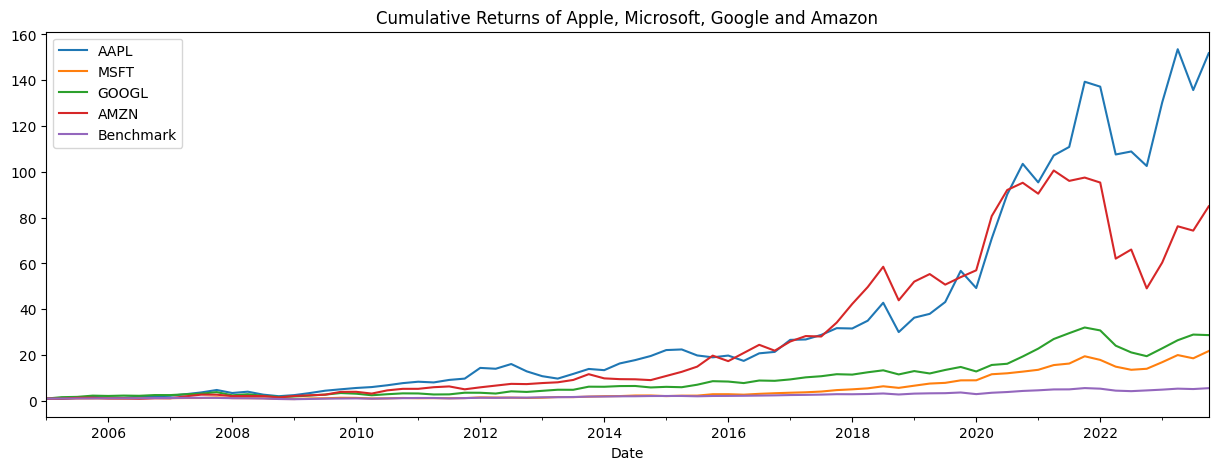

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period="quarterly")["Cumulative Return"].plot(
    figsize=(15, 5), title="Cumulative Returns of Apple, Microsoft, Google and Amazon"
)

It can be of help to understand some general statistics about this data as well, this can be done with `get_historical_statistics`. This is especially relevant when looking at products that are denoted in different currencies.

In [4]:
companies.get_historical_statistics()

Obtaining historical statistics: 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]


,AAPL,MSFT,GOOGL,AMZN
Currency,USD,USD,USD,USD
Symbol,AAPL,MSFT,GOOGL,AMZN
Exchange Name,NMS,NMS,NMS,NMS
Instrument Type,EQUITY,EQUITY,EQUITY,EQUITY
First Trade Date,1980-12-12,1986-03-13,2004-08-19,1997-05-15
Regular Market Time,2023-12-04,2023-12-04,2023-12-04,2023-12-04
GMT Offset,-18000,-18000,-18000,-18000
Timezone,EST,EST,EST,EST
Exchange Timezone Name,America/New_York,America/New_York,America/New_York,America/New_York


Then on to the financial statements in which for any period, based on how this is defined in the Toolkit initialization, can be collected. This can also be quarterly financial statements if the `quarterly=True` parameter is added to the Toolkit initialization.

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining exchange data: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


date                                          2005          2006  \
AAPL Cash and Cash Equivalents        3491000000.0  6392000000.0   
     Short Term Investments           4770000000.0  3718000000.0   
     Cash and Short Term Investments  8261000000.0 10110000000.0   
     Accounts Receivable              1312000000.0  2845000000.0   
     Inventory                         165000000.0   270000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    70815000000.0 69597000000.0   
     Total Investments               32900000000.0 27447000000.0   
     Total Debt                                0.0           0.0   
     Net Debt                        -4851000000.0 -6714000000.0   

date                                          2007           2008  \
AAPL Cash and Cash Equivalents        9352000000.0  11875000000.0   
     Short Term Investments           6034000000.0  12615000000.0   
     Cash and Short Term Investments 15386000000.0  24490000000.0   
     Accounts Receivable              4029000000.0   2422000000.0   
     Inventory                         346000000.0    509000000.0   
...                                            ...            ...   
MSFT Minority Interest                         0.0            0.0   
     Total Liabilities and Equity    63171000000.0  72793000000.0   
     Total Investments               17300000000.0  19911000000.0   
     Total Debt                                0.0            0.0   
     Net Debt                        -6111000000.0 -10339000000.0   

date                                          2009          2010  \
AAPL Cash and Cash Equivalents        5263000000.0 11261000000.0   
     Short Term Investments          18201000000.0 14359000000.0   
     Cash and Short Term Investments 23464000000.0 25620000000.0   
     Accounts Receivable              3361000000.0  9924000000.0   
     Inventory                         455000000.0  1051000000.0   
...                                            ...           ...   
MSFT Minority Interest                         0.0           0.0   
     Total Liabilities and Equity    77888000000.0 86113000000.0   
     Total Investments               30304000000.0 39037000000.0   
     Total Debt                       5746000000.0  5939000000.0   
     Net Debt                         -330000000.0   434000000.0   

date                                           2011           2012  \
AAPL Cash and Cash Equivalents         9815000000.0  10746000000.0   
     Short Term Investments           16137000000.0  18383000000.0   
     Cash and Short Term Investments  25952000000.0  29129000000.0   
     Accounts Receivable              11717000000.0  18692000000.0   
     Inventory                          776000000.0    791000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    108704000000.0 121271000000.0   
     Total Investments                54027000000.0  65878000000.0   
     Total Debt                       11921000000.0  11944000000.0   
     Net Debt                          2311000000.0   5006000000.0   

date                                           2013           2014  \
AAPL Cash and Cash Equivalents        14259000000.0  13844000000.0   
     Short Term Investments           26287000000.0  11233000000.0   
     Cash and Short Term Investments  40546000000.0  25077000000.0   
     Accounts Receivable              20641000000.0  27219000000.0   
     Inventory                         1764000000.0   2111000000.0   
...                                             ...            ...   
MSFT Minority Interest                          0.0            0.0   
     Total Liabilities and Equity    142431000000.0 172384000000.0   
     Total Investments                84062000000.0  91637000000.0

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


date                                            2005          2006  \
AAPL Revenue                           13931000000.0 19315000000.0   
     Cost of Goods Sold                 9888000000.0 13717000000.0   
     Gross Profit                       4043000000.0  5598000000.0   
     Gross Profit Ratio                       0.2902        0.2898   
     Research and Development Expenses   534000000.0   712000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                          0.308        0.2845   
     EPS                                        1.13          1.21   
     EPS Diluted                                1.12           1.2   
     Weighted Average Shares           10839000000.0 10438000000.0   
     Weighted Average Shares Diluted   10906000000.0 10531000000.0   

date                                            2007          2008  \
AAPL Revenue                           24006000000.0 32479000000.0   
     Cost of Goods Sold                15852000000.0 21334000000.0   
     Gross Profit                       8154000000.0 11145000000.0   
     Gross Profit Ratio                       0.3397        0.3431   
     Research and Development Expenses   782000000.0  1109000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2751        0.2926   
     EPS                                        1.44           1.9   
     EPS Diluted                                1.42          1.87   
     Weighted Average Shares            9742000000.0  9328000000.0   
     Weighted Average Shares Diluted    9886000000.0  9470000000.0   

date                                            2009          2010  \
AAPL Revenue                           36537000000.0 65225000000.0   
     Cost of Goods Sold                23397000000.0 39541000000.0   
     Gross Profit                      13140000000.0 25684000000.0   
     Gross Profit Ratio                       0.3596        0.3938   
     Research and Development Expenses  1333000000.0  1782000000.0   
...                                              ...           ...   
MSFT Net Income Ratio                         0.2493        0.3002   
     EPS                                        1.63          2.13   
     EPS Diluted                                1.62           2.1   
     Weighted Average Shares            8945000000.0  8813000000.0   
     Weighted Average Shares Diluted    8996000000.0  8927000000.0   

date                                             2011           2012  \
AAPL Revenue                           108249000000.0 156508000000.0   
     Cost of Goods Sold                 64431000000.0  87846000000.0   
     Gross Profit                       43818000000.0  68662000000.0   
     Gross Profit Ratio                        0.4048         0.4387   
     Research and Development Expenses   2429000000.0   3381000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                           0.331         0.2303   
     EPS                                         2.73           2.02   
     EPS Diluted                                 2.69            2.0   
     Weighted Average Shares             8490000000.0   8396000000.0   
     Weighted Average Shares Diluted     8593000000.0   8506000000.0   

date                                             2013           2014  \
AAPL Revenue                           170910000000.0 182795000000.0   
     Cost of Goods Sold                106606000000.0 112258000000.0   
     Gross Profit                       64304000000.0  70537000000.0   
     Gross Profit Ratio                        0.3762         0.3859   
     Research and Development Expenses   4475000000.0   6041000000.0   
...                                               ...            ...   
MSFT Net Income Ratio                          0.2808         0.2542   
     EPS                            

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1335000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax             505000000.0    53000000.0    78000000.0   
     Stock Based Compensation         42000000.0   163000000.0   242000000.0   
     Change in Working Capital       465000000.0  -221000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             4851000000.0  6714000000.0  6111000000.0   
     Cash Beginning of Period      14304000000.0  4851000000.0  6714000000.0   
     Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   

date                                        2008          2009          2010  \
AAPL Net Income                     4834000000.0  5704000000.0 14013000000.0   
     Depreciation and Amortization   473000000.0   703000000.0  1027000000.0   
     Deferred Income Tax            -368000000.0  -519000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      4119000000.0  3535000000.0  1212000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period            10339000000.0  6076000000.0  5505000000.0   
     Cash Beginning of Period       6111000000.0 10339000000.0  6076000000.0   
     Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             9610000000.0  6938000000.0  3804000000.0   
     Cash Beginning of Period       5505000000.0  9610000000.0  6938000000.0   
     Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   

date                                        2014          2015          2016  \
AAPL Net Income                    39510000000.0 53394000000.0 45687000000.0   
     Depreciation and Amortization  7946000000.0 11257000000.0 10505000000.0   
     Deferred Income Tax            2347000000.0  1382000000.0  4938000000.0   
     Stock Based Compensation       2863000000.0  3586000000.0  4210000000.0   
     Change in Working Capital      7047000000.0 11647000000.0   484000000.0   
...                                          ...           ...           ...   
MSFT Cash End of Period             8669000000.0  5595000000.0  6510000000.0   
     Cash Beginning of Period       3804000000.0  8669000000.0  5595000000.0   
     Operating Cash Flow           32231000000.0 29080000000.0 33325000000.0   
     Capital Expenditure           -5485000000.0 -5944000000.0 -8343000000.0   
     Free Cash Flow                26746000000.0 23136000000.0 24982000000.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and 

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,15890000000.0,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,NaN
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,3918000000.0,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,NaN
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,19808000000.0,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,NaN
Accounts Receivable,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
Inventory,566000000.0,877000000.0,1200000000.0,1399000000.0,2171000000.0,3202000000.0,4992000000.0,6031000000.0,7411000000.0,8299000000.0,10243000000.0,11461000000.0,16047000000.0,17174000000.0,20497000000.0,23795000000.0,32640000000.0,34405000000.0,NaN


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,1312000000.0,2845000000.0,4029000000.0,2422000000.0,3361000000.0,9924000000.0,11717000000.0,18692000000.0,20641000000.0,27219000000.0,30343000000.0,29299000000.0,35673000000.0,48995000000.0,45804000000.0,37445000000.0,51506000000.0,60932000000.0,60985000000.0
AMZN,274000000.0,399000000.0,705000000.0,827000000.0,988000000.0,1587000000.0,2571000000.0,3364000000.0,4767000000.0,5612000000.0,6423000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,NaN
GOOGL,687976000.0,1322340000.0,2307774000.0,2642192000.0,3201715000.0,5002000000.0,6172000000.0,8585000000.0,9390000000.0,11556000000.0,13909000000.0,14232000000.0,18705000000.0,21193000000.0,27492000000.0,31384000000.0,40270000000.0,40258000000.0,NaN
MSFT,7180000000.0,9316000000.0,11338000000.0,13589000000.0,11192000000.0,13014000000.0,14987000000.0,15780000000.0,17486000000.0,19544000000.0,17908000000.0,18277000000.0,19792000000.0,26481000000.0,29524000000.0,32011000000.0,38043000000.0,44261000000.0,48688000000.0


<Axes: title={'center': 'Total Shareholder Equity in 2022'}>

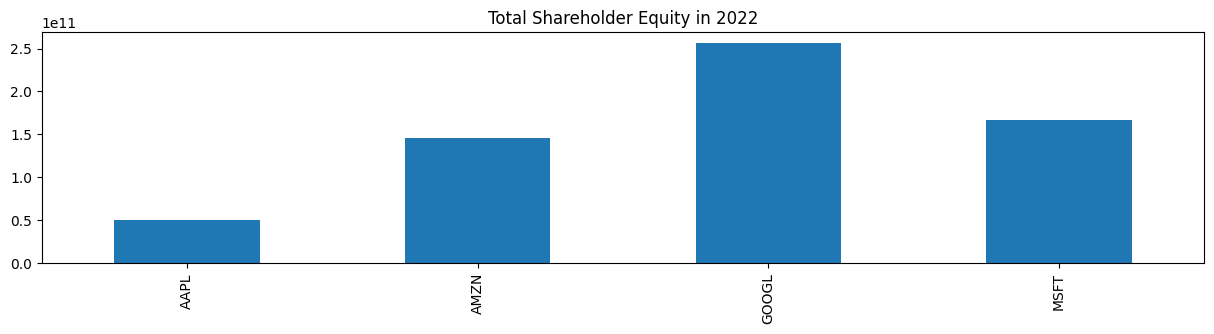

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2022
balance_sheet.loc[:, "Total Shareholder Equity", :]["2022"].plot.bar(
    figsize=(15, 3), title="Total Shareholder Equity in 2022"
)

For all of the financial statements, it is also possible to show the growth instead. E.g. if you are interested in revenue growth you can use the following:

In [9]:
companies.get_income_statement(growth=True)

date                                    2005    2006    2007    2008    2009  \
AAPL Revenue                             NaN  0.3865  0.2429   0.353  0.1249   
     Cost of Goods Sold                  NaN  0.3872  0.1556  0.3458  0.0967   
     Gross Profit                        NaN  0.3846  0.4566  0.3668   0.179   
     Gross Profit Ratio                  NaN -0.0014  0.1722    0.01  0.0481   
     Research and Development Expenses   NaN  0.3333  0.0983  0.4182   0.202   
...                                      ...     ...     ...     ...     ...   
MSFT Net Income Ratio                    NaN -0.0763  -0.033  0.0636  -0.148   
     EPS                                 NaN  0.0708  0.1901  0.3194 -0.1421   
     EPS Diluted                         NaN  0.0714  0.1833  0.3169 -0.1337   
     Weighted Average Shares             NaN  -0.037 -0.0667 -0.0425 -0.0411   
     Weighted Average Shares Diluted     NaN -0.0344 -0.0612 -0.0421 -0.0501   

date                                      2010    2011    2012    2013  \
AAPL Revenue                            0.7852  0.6596  0.4458   0.092   
     Cost of Goods Sold                   0.69  0.6295  0.3634  0.2136   
     Gross Profit                       0.9546   0.706   0.567 -0.0635   
     Gross Profit Ratio                 0.0951  0.0279  0.0837 -0.1425   
     Research and Development Expenses  0.3368  0.3631  0.3919  0.3236   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                   0.2042  0.1026 -0.3042  0.2193   
     EPS                                0.3067  0.2817 -0.2601  0.2921   
     EPS Diluted                        0.2963   0.281 -0.2565    0.29   
     Weighted Average Shares           -0.0148 -0.0367 -0.0111  0.0093   
     Weighted Average Shares Diluted   -0.0077 -0.0374 -0.0101 -0.0042   

date                                      2014    2015    2016    2017  \
AAPL Revenue                            0.0695  0.2786 -0.0773   0.063   
     Cost of Goods Sold                  0.053  0.2479 -0.0622  0.0736   
     Gross Profit                       0.0969  0.3273    -0.1  0.0466   
     Gross Profit Ratio                 0.0258  0.0381 -0.0245 -0.0156   
     Research and Development Expenses  0.3499  0.3354  0.2452  0.1529   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.0947 -0.4874  0.5111  0.1971   
     EPS                                0.0192 -0.4398  0.7383  0.2703   
     EPS Diluted                        0.0194 -0.4373  0.7297  0.2695   
     Weighted Average Shares           -0.0095 -0.0184 -0.0262 -0.0225   
     Weighted Average Shares Diluted   -0.0084 -0.0173 -0.0292 -0.0226   

date                                      2018    2019    2020    2021  \
AAPL Revenue                            0.1586 -0.0204  0.0551  0.3326   
     Cost of Goods Sold                  0.161 -0.0121  0.0481  0.2561   
     Gross Profit                       0.1548 -0.0338  0.0667  0.4562   
     Gross Profit Ratio                -0.0034 -0.0136  0.0108  0.0929   
     Research and Development Expenses  0.2293  0.1392  0.1563  0.1686   
...                                        ...     ...     ...     ...   
MSFT Net Income Ratio                  -0.3627  1.0759 -0.0071  0.1773   
     EPS                               -0.3465  1.3535  0.1502  0.3952   
     EPS Diluted                       -0.3446  1.3756  0.1383  0.3976   
     Weighted Average Shares            -0.008 -0.0032 -0.0087 -0.0099   
     Weighted Average Shares Diluted   -0.0049 -0.0053  -0.009 -0.0098   

date                                      2022    2023  
AAPL Revenue                            0.0779  -0.028  
     Cost of Goods Sold                 0.0496 -0.0421  
     Gross Profit                       0.1174 -0.0096  
     Gross Profit Ratio                 0.0366  0.0189  
     Research and Development Expenses  0.1979  0.1396  
...                           

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [10]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3872  0.1556  0.3458   
                                     Lag 2   NaN     NaN  0.6032  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1  0.1249  0.7852  0.6596  0.4458   
                                     Lag 2   0.522  1.0082  1.9627  1.3995   
                                     Lag 3  0.8916   1.717  2.3329  3.2835   
     Cost of Goods Sold              Lag 1  0.0967    0.69  0.6295  0.3634   
                                     Lag 2   0.476  0.8534  1.7538  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014    2015    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  0.2786 -0.0773   
                                     Lag 2  0.5789   0.168  0.3675  0.1797   
                                     Lag 3  1.6203  0.6887  0.4933  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  0.2479 -0.0622   
                                     Lag 2  0.6546  0.2779  0.3141  0.1703   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0019 -0.0003 -0.0278 -0.0441   
                                     Lag 3 -0.0385 -0.0114 -0.0188 -0.0532   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084 -0.0173 -0.0292   
                                     Lag 2 -0.0143 -0.0126 -0.0255  -0.046   
                                     Lag 3 -0.0512 -0.0226 -0.0296  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2  -0.048 -0.0303 -0.0112 -0.0118   
                                     Lag 3 -0.0656 -0.0557 -0.0334 -0.0198   
     Weighted Average Shares Diluted Lag 1 -0.0226 -0.0049 -0.0053  -0.009   
                                     Lag 2 -0.0511 -0.0273 -0.0101 -0.0142   
                                     Lag 3 -0.0675 -0.0557 -0.0324  -0.019   

date                                          2021    2022    2023  
AAPL Revenue                         Lag 1  0.3326  0.0779  -0.028  
                                     Lag 2   0.406  0.4365  0.0478  
                                     Lag 3  0.3773  0.5156  0.3962  


It is also possible to get trailing results. E.g. the TTM Revenues can be acquired by setting trailing to 4 (quarters). Note that this does not lead to meaningful results when using yearly data and therefore this image is for illustrative purposes only. Set `quarterly=True` in the Toolkit initialization to use quarterly data.

<Axes: title={'center': '12-Month Trailing (TTM) Revenue for Apple, Microsoft, Google and Amazon'}, xlabel='date'>

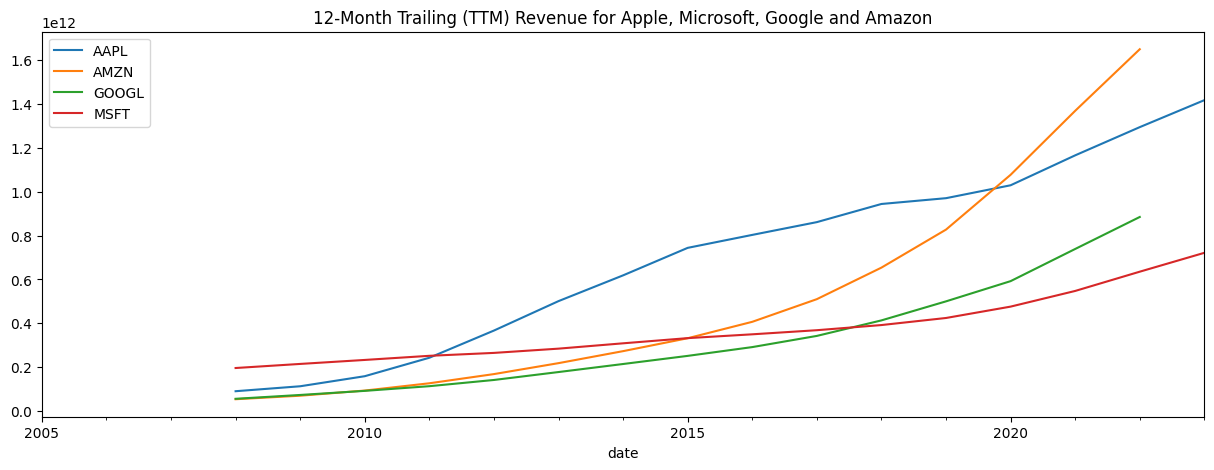

In [11]:
companies.get_income_statement(trailing=4).loc[:, "Revenue", :].T.plot(
    figsize=(15, 5),
    title="12-Month Trailing (TTM) Revenue for Apple, Microsoft, Google and Amazon",
)

It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature.

In [12]:
companies.get_revenue_product_segmentation()

Obtaining product segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


2010          2011  \
AAPL  Accessories                                         0.0           0.0   
      Apple Ipad                                          0.0           0.0   
      Apple Iphone                                        0.0           0.0   
      Apple Mac                                           0.0           0.0   
      Desktops                                            0.0  6439000000.0   
      Ipad                                                0.0           0.0   
      Ipad And Related Products And Services              0.0 20358000000.0   
      Ipad Related Products And Services                  0.0           0.0   
      Iphone                                              0.0           0.0   
      Iphone And Related Products And Services            0.0 47057000000.0   
      Iphone Related Products And Services                0.0           0.0   
      Ipod                                                0.0  7453000000.0   
      Itunes Software And Service                         0.0           0.0   
      Itunes, Software And Service                        0.0           0.0   
      Mac                                                 0.0           0.0   
      Manufactured Product, Other                         0.0           0.0   
      Other Music Related Products And Services           0.0  6314000000.0   
      Other Products                                      0.0           0.0   
      Peripherals And Other Hardware                      0.0  2330000000.0   
      Portables                                           0.0 15344000000.0   
      Retail                                     9798000000.0           0.0   
      Service                                             0.0           0.0   
      Services                                            0.0           0.0   
      Software Service And Other Net Sales                0.0           0.0   
      Software, Service And Other Net Sales               0.0  2954000000.0   
      Total Mac Net Sales                                 0.0 21783000000.0   
      Total Macs                                          0.0           0.0   
      Wearables, Home And Accessories                     0.0           0.0   
MSFT  Devices                                             0.0 13251000000.0   
      Dynamics                                            0.0           0.0   
      Enterprise Services                                 0.0           0.0   
      Gaming                                     8114000000.0           0.0   
      Linked In Corporation                               0.0           0.0   
      Office Products And Cloud Services                  0.0 20730000000.0   
      Other Products And Services                         0.0           0.0   
      Search And News Advertising                         0.0  2913000000.0   
      Server Products And Cloud Services                  0.0           0.0   
      Service Other                               597000000.0  3749000000.0   
      Windows                                   17788000000.0 17825000000.0   
      Xbox                                                0.0  8103000000.0   
GOOGL Google Cloud                                        NaN           NaN   
      Google Inc.                                         NaN           NaN   
      Other Segments                                      NaN           NaN   
AMZN  Advertising                                         NaN           0.0   
      Amazon Web Services                                 NaN           0.0   
      Electronics And Other General Merchandise           NaN 28712000000.0   
      Media                                               NaN 17779000000.0   
      Online Stores                                       NaN           0.0   
      Other Non Retail                                    NaN  1586000000.0   
      Other Services                                      NaN           0.0   
      Physical Stores       

In [13]:
companies.get_revenue_geographic_segmentation()

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.62it/s]


2010          2011  \
AAPL  Americas                         24498000000.0 38315000000.0   
      Asia Pacific                      8256000000.0 22592000000.0   
      China                                      0.0           0.0   
      Europe                           18692000000.0 27778000000.0   
      Japan                                      0.0  5437000000.0   
      Other Countries                            0.0           0.0   
      United States                              0.0           0.0   
MSFT  Non-Us                                     0.0           0.0   
      Other Countries                            0.0           0.0   
      Unallocated And Other              597000000.0   828000000.0   
      United States                              0.0           0.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                                    NaN           NaN   
      Japan                                      NaN           NaN   
      Non-Us                                     NaN           NaN   
      Rest Of World                              NaN           NaN   
      United States                              NaN           NaN   

                                                2012          2013  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            22797000000.0 25946000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  72762000000.0 78767000000.0   
      United States                    60949000000.0 66197000000.0   
MSFT  Non-Us                                     NaN           0.0   
      Other Countries                            NaN 36505000000.0   
      Unallocated And Other                      NaN           0.0   
      United States                              NaN 41344000000.0   
GOOGL Americas Excluding United States           NaN           NaN   
      Asia Pacific                               NaN           NaN   
      Emea                                       NaN           NaN   
      Rest Of The World                          NaN           NaN   
      United States                              NaN           NaN   
AMZN  Germany                           8732000000.0 10535000000.0   
      Japan                             7800000000.0  7639000000.0   
      Non-Us                                     0.0           0.0   
      Rest Of World                              0.0           0.0   
      United States                              0.0           0.0   

                                                2014          2015  \
AAPL  Americas                                   0.0           0.0   
      Asia Pacific                               0.0           0.0   
      China                            30638000000.0 56547000000.0   
      Europe                                     0.0           0.0   
      Japan                                      0.0           0.0   
      Other Countries                  83248000000.0 95436000000.0   
      United States                    68909000000.0 81732000000.0   
MSFT  Non-Us                                     0.0 50639000000.0   
      Other Countries                  43359000000.0           0.0   
      Unallocated And Other                      0.0           0.0   
      United States                    43474000000.0 42941000000.0   
GOOGL Americas Excluding United States           NaN           0.0   
      Asia Pacific                               NaN    

Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [14]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


date                                        2005          2006          2007  \
AAPL Estimated Revenue Low         13764423000.0 21759157766.0 18142767855.0   
     Estimated Revenue High        14585189787.0 23056647243.0 19224613513.0   
     Estimated Revenue Average     14163574996.0 22390147619.0 18668886675.0   
     Estimated EBITDA Low           1741024242.0  6804860732.0  4015137390.0   
     Estimated EBITDA High          2611536363.0  7210631732.0  6022706085.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1089289766.0  1323300865.0  1770191918.0   
     Estimated EPS Average                0.0222          0.02        0.0444   
     Estimated EPS High                    0.029        0.0262        0.0579   
     Estimated EPS Low                    0.0164        0.0148        0.0328   
     Number of Analysts                     80.0          78.0          76.0   

date                                        2008          2009          2010  \
AAPL Estimated Revenue Low         32602804276.0 34259565725.0 55454264534.0   
     Estimated Revenue High        34546895858.0 36302449300.0 58760979133.0   
     Estimated Revenue Average     33548247058.0 35253052631.0 57062372649.0   
     Estimated EBITDA Low           4898933332.0  7880186154.0 14640464486.0   
     Estimated EBITDA High          7348399998.0 11820279232.0 21960696730.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1886118461.0  2329935197.0  4695092398.0   
     Estimated EPS Average                 0.068        0.0834        0.1212   
     Estimated EPS High                   0.0887        0.1089        0.1582   
     Estimated EPS Low                    0.0503        0.0618        0.0897   
     Number of Analysts                     74.0          72.0          70.0   

date                                        2011           2012  \
AAPL Estimated Revenue Low         91629393045.0 137024810595.0   
     Estimated Revenue High        97093215427.0 145195542739.0   
     Estimated Revenue Average     94286537122.0 140998368116.0   
     Estimated EBITDA Low          27829630700.0  48165863290.0   
     Estimated EBITDA High         41744446050.0  72248794936.0   
...                                          ...            ...   
AMZN Estimated SGA Expense Average  7088709968.0  13180000000.0   
     Estimated EPS Average                0.0464         0.0083   
     Estimated EPS High                   0.0605         0.0108   
     Estimated EPS Low                    0.0343         0.0061   
     Number of Analysts                     68.0           66.0   

date                                         2013           2014  \
AAPL Estimated Revenue Low         162578581152.0 166084596859.0   
     Estimated Revenue High        172273073946.0 175988151902.0   
     Estimated Revenue Average     167293167810.0 170900853827.0   
     Estimated EBITDA Low           45114743880.0  48311071150.0   
     Estimated EBITDA High          67672115819.0  72466606725.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   5638539460.0   4310017547.0   
     Estimated EPS Average                  0.024        -0.0267   
     Estimated EPS High                    0.0314        -0.0349   
     Estimated EPS Low                     0.0178        -0.0198   
     Number of Analysts                      64.0           62.0   

date                                         2015           2016  \
AAPL Estimated Revenue Low         209031979504.0 209591664866.0   
     Estimated Revenue High        221496469012.0 222089528178.0   
     Estimated Revenue Average     215093659798.0 215669575374.0   
     Estimated EBITDA Low           65528314429.0  57835982111.0   
     Estimated EBITDA High          98292471646.0  86753973169.0   
...                                           ..

In [15]:
companies.get_earnings_calendar()

Obtaining earnings calendars: 100%|██████████| 4/4 [00:00<00:00,  9.43it/s]


EPS  Estimated EPS        Revenue  Estimated Revenue  \
     date                                                                 
AAPL 2005-01-12 0.0126         0.0087   3490000000.0       2879249998.5   
     2005-04-13 0.0121         0.0087   3243000000.0      2675474997.75   
     2005-07-13 0.0133         0.0113   3520000000.0       2816000000.0   
     2005-10-11 0.0176         0.0172   3678000000.0       5792850000.0   
     2006-01-18   0.02         0.0187   5749000000.0       5749000000.0   
...                ...            ...            ...                ...   
AMZN 2022-10-27    0.2           0.22 127101000000.0                NaN   
     2023-02-02   0.21           0.15 149204000000.0     155150000000.0   
     2023-04-27   0.31           0.21 127358000000.0     124551000000.0   
     2023-08-03   0.65           0.35 134383000000.0     119573000000.0   
     2023-10-26   0.94           0.58 143083000000.0     133393000000.0   

                Fiscal Date Ending Time  
     date                                
AAPL 2005-01-12         2004-12-25  amc  
     2005-04-13         2005-03-26  amc  
     2005-07-13         2005-06-25  amc  
     2005-10-11         2005-09-24  amc  
     2006-01-18         2005-12-31  amc  
...                            ...  ...  
AMZN 2022-10-27         2022-09-30  amc  
     2023-02-02         2022-12-31  amc  
     2023-04-27         2023-03-31  amc  
     2023-08-03         2023-06-30  amc  
     2023-10-26         2023-09-30  amc  

[304 rows x 6 columns]

Not only Earnings, also Dividend Calendars can be viewed through `get_dividend_calendar`

In [16]:
companies.get_dividend_calendar()

Obtaining dividend calendars: 100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


No data found for the following tickers: GOOGL, AMZN


Adj Dividend  Dividend Record Date Payment Date  \
     date                                                          
AAPL 2012-08-09        0.0946      2.65  2012-08-13   2012-08-16   
     2012-11-07        0.0946      2.65  2012-11-12   2012-11-15   
     2013-02-07        0.0946      2.65  2013-02-11   2013-02-14   
     2013-05-09        0.1089      3.05  2013-05-13   2013-05-16   
     2013-08-08        0.1089      3.05  2013-08-12   2013-08-15   
...                       ...       ...         ...          ...   
MSFT 2022-11-16          0.68      0.68  2022-11-17   2022-12-08   
     2023-02-15          0.68      0.68  2023-02-16   2023-03-09   
     2023-05-17          0.68      0.68  2023-05-18   2023-06-08   
     2023-08-16          0.68      0.68  2023-08-17   2023-09-14   
     2023-11-15          0.75      0.75  2023-11-16   2023-12-14   

                Declaration Date  
     date                         
AAPL 2012-08-09       2012-07-24  
     2012-11-07       2012-10-25  
     2013-02-07       2013-01-24  
     2013-05-09       2013-04-23  
     2013-08-08       2013-07-24  
...                          ...  
MSFT 2022-11-16       2022-09-20  
     2023-02-15       2022-11-29  
     2023-05-17       2023-03-14  
     2023-08-16       2023-06-13  
     2023-11-15       2023-09-19  

[122 rows x 5 columns]

It is also possible to look into Environmental, Social and Governance (ESG) data through `get_esg_scores`

In [17]:
companies.get_esg_scores()

Obtaining ESG scores: 100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Environmental Score                   Social Score                    \
                    AAPL  MSFT GOOGL  AMZN         AAPL  MSFT GOOGL  AMZN   
date                                                                        
2005               67.69 74.03   NaN 53.35         46.7 61.05   NaN 57.51   
2006               67.88   NaN   NaN 52.78        46.73   NaN   NaN 57.86   
2007               65.66   NaN   NaN 52.06        46.24   NaN   NaN  56.6   
2008               67.01   NaN   NaN 52.35        48.85   NaN   NaN 55.88   
2009               66.85   NaN   NaN 48.72        47.68   NaN   NaN 55.36   
2010                67.1   NaN   NaN  48.1        48.28   NaN   NaN 55.09   
2011               65.49 75.44   NaN 47.79        48.06 60.32   NaN 54.66   
2012               64.47 74.91   NaN 47.92        48.05 59.68   NaN 55.33   
2013               64.58 73.77   NaN 48.16        48.19 59.86   NaN 55.71   
2014               66.48 73.52   NaN 49.21        48.59 59.64   NaN 57.21   
2015               66.37 73.67 76.87 47.96        48.21 57.75 58.25 57.67   
2016               67.53 74.64 76.09 47.76        48.08 59.63 58.89 57.61   
2017               67.33 74.01 75.36  48.1        47.77 58.18 57.85 58.03   
2018               67.06  73.9 72.97 48.43         47.1 58.61 57.17 57.74   
2019               67.43 74.77 73.85 49.12        46.73 59.84 57.56 58.08   
2020               72.83  73.4  69.4 49.38        52.18 58.18 54.64 58.47   
2021               72.93 73.56 76.24 50.14        51.62 58.83 55.91  58.9   
2022               72.39 73.03 75.83  50.0        54.17 58.66 54.53 59.14   
2023               72.79  72.6 76.51 49.57        55.23 58.74 55.52 59.05   

     Governance Score                   ESG Score                    
                 AAPL  MSFT GOOGL  AMZN      AAPL  MSFT GOOGL  AMZN  
date                                                                 
2005            60.09 61.92   NaN 53.51     58.16 65.67   NaN 54.79  
2006            60.15   NaN   NaN 53.49     58.25   NaN   NaN 54.71  
2007            59.32   NaN   NaN 53.59     57.07   NaN   NaN 54.08  
2008            60.75   NaN   NaN 53.07     58.87   NaN   NaN 53.77  
2009            61.84   NaN   NaN 53.35     58.79   NaN   NaN 52.47  
2010            62.38   NaN   NaN 53.15     59.25   NaN   NaN 52.12  
2011             61.3 62.99   NaN 53.53     58.29 66.25   NaN 51.99  
2012            61.48 62.87   NaN 53.89      58.0 65.82   NaN 52.38  
2013            61.54 64.08   NaN 53.95      58.1  65.9   NaN  52.6  
2014             61.7 63.91   NaN 55.18     58.93 65.69   NaN 53.87  
2015            61.35 61.94 60.99 54.64     58.64 64.45 65.37 53.42  
2016            61.73 63.55 60.63 54.13     59.11 65.94  65.2 53.17  
2017            61.81 61.91  59.5  54.4     58.97  64.7 64.24 53.51  
2018            61.26 61.46 59.05 54.31     58.47 64.65 63.06  53.5  
2019            61.02 63.07 59.15  54.3      58.4 65.89 63.52 53.83  
2020            62.05 61.05 56.79 53.18     62.35 64.21 60.28 53.68  
2021            62.23 61.84 60.69 53.16     62.26 64.74 64.28 54.07  
2022            65.05  61.4 60.76 53.53     63.87 64.37 63.71 54.22  
2023            65.73 61.88  60.8 52.78     64.59 64.41 64.28  53.8

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [18]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
date                                                                       
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
2005-01-07  0.0227 0.0368  0.0426  0.0484  0.0228 0.0375  0.0431  0.0486   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2023-11-28  0.0527  0.044   0.044  0.0454  0.0527 0.0442  0.0442  0.0457   
2023-11-29  0.0525 0.0423  0.0429  0.0449  0.0525 0.0426  0.0432  0.0451   
2023-11-30  0.0524 0.0421  0.0428  0.0446  0.0524  0.043  0.0435  0.0452   
2023-12-01  0.0523 0.0426  0.0432  0.0449  0.0523  0.043  0.0435  0.0452   
2023-12-04  0.0522 0.0418  0.0424  0.0442  0.0523 0.0422  0.0427  0.0444   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
date                       ...                                             
2005-01-03   0.022 0.0361  ...     0.0  -0.001     0.4908 0.0366  0.0271   
2005-01-04  0.0228 0.0361  ...  0.0142  0.0129     0.4908 0.0366  0.0271   
2005-01-05  0.0228 0.0369  ...     0.0 -0.0066     0.4908 0.0366  0.0271   
2005-01-06  0.0227 0.0368  ... -0.0023  0.0014     0.4908 0.0366  0.0271   
2005-01-07  0.0227 0.0356  ...  0.0047 -0.0002     0.4908 0.0366  0.0271   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2023-11-28  0.0526 0.0429  ... -0.0121  -0.002     0.4908 0.0366  0.0271   
2023-11-29  0.0524 0.0419  ...  -0.015 -0.0161     0.4908 0.0366  0.0271   
2023-11-30  0.0523 0.0421  ...   0.019  0.0139     0.4908 0.0366  0.0271   
2023-12-01   0.052 0.0413  ...  -0.029 -0.0211     0.4908 0.0366  0.0271   
2023-12-04  0.0522 0.0418  ...  0.0104  0.0038     0.4908 0.0366  0.0271   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
date                                                         
2005-01-03  0.0191               1.0    1.0     1.0     1.0  
2005-01-04  0.0191            1.0399 1.0212  1.0142  1.0129  
2005-01-05  0.0191            1.0354 1.0229  1.0142  1.0062  
2005-01-06  0.0191            1.0286 1.0185  1.0118  1.0077  
2005-01-07  0.0191            1.0331 1.0267  1.0166  1.0075  
...            ...               ...    ...     ...     ...  
2023-11-28  0.0191            2.3866 1.1814  1.0275  0.9392  
2023-11-29  0.0191            2.3775 1.1629  1.0121   0.924  
2023-11-30  0.0191            2.3766 1.1847  1.0313  0.9369  
2023-12-01  0.0191            2.3662 1.1455  1.0014  0.9172  
2023-12-04  0.0191            2.3721 1.1623  1.0118  0.9207  

[4757 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [19]:
companies.get_profile()

Obtaining company profiles: 100%|██████████| 4/4 [00:00<00:00,  9.34it/s]


,AAPL,MSFT,GOOGL,AMZN
Symbol,AAPL,MSFT,GOOGL,AMZN
Price,189.91,368.74,129.81,145.18
Beta,1.305,0.885,1.05,1.175
Average Volume,57485167,24298603,26966529,53706751
Market Capitalization,2953632248000,2740571552400,768215580000,1500290120000
Last Dividend,0.96,3,0,0
Range,124.17-198.23,219.35-384.3,84.86-141.22,81.43-149.26
Changes,-1.33,-5.77,-2.05,-1.85
Company Name,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
Currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Ratios-Module) to find all the available ratios.

In [20]:
ratios = companies.ratios

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [21]:
ratios.collect_valuation_ratios()

2005          2006          2007  \
AAPL Earnings per Share (EPS)              0.0556        0.0809        0.1404   
     Revenue per Share (RPS)               0.5806        0.7861        0.9641   
     Price-to-Earnings (PE)               39.2086       31.7676        42.735   
     Price-to-Earnings-Growth (PEG)           NaN       69.8496       58.1904   
     Book Value per Share                  0.3112        0.4063        0.5836   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                           11.8486        11.996       12.4389   
     EV-to-EBITDA                         12.7802       12.6084       12.5243   
     EV-to-Operating-Cash-Flow             11.865        15.209       14.0501   
     Tangible Asset Value           48115000000.0 36238000000.0 26337000000.0   
     Net Current Asset Value        31860000000.0 26568000000.0 16414000000.0   

                                             2008          2009          2010  \
AAPL Earnings per Share (EPS)              0.1914        0.2246        0.5412   
     Revenue per Share (RPS)               1.2858        1.4387        2.5191   
     Price-to-Earnings (PE)               13.4796       28.4061       18.0525   
     Price-to-Earnings-Growth (PEG)       37.1339      163.6296       12.8059   
     Book Value per Share                  0.8325        1.0959        1.8458   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                            5.2962       10.4766        7.6835   
     EV-to-EBITDA                          5.1378        9.0581        7.2222   
     EV-to-Operating-Cash-Flow             5.8358       10.9081        8.0317   
     Tangible Asset Value           24178000000.0 27055000000.0 33781000000.0   
     Net Current Asset Value        13356000000.0 22246000000.0 29529000000.0   

                                             2011          2012          2013  \
AAPL Earnings per Share (EPS)              0.9884        1.5766        1.4198   
     Revenue per Share (RPS)               4.1275        5.9127        6.5517   
     Price-to-Earnings (PE)               12.4039        10.307        12.375   
     Price-to-Earnings-Growth (PEG)       15.0114       17.3198     -124.3719   
     Book Value per Share                  2.9213        4.4658        4.7361   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                             6.331        8.4202       10.1379   
     EV-to-EBITDA                          6.0008         7.711        9.0349   
     EV-to-Operating-Cash-Flow             6.6528        6.0296        9.6626   
     Tangible Asset Value           44502000000.0 52911000000.0 64289000000.0   
     Net Current Asset Value        46144000000.0 52396000000.0 64049000000.0   

                                             2014          2015          2016  \
AAPL Earnings per Share (EPS)              1.6133        2.3042        2.0766   
     Revenue per Share (RPS)               7.4639        10.086        9.8013   
     Price-to-Earnings (PE)               15.3102       10.3984       12.9779   
     Price-to-Earnings-Growth (PEG)      112.3272       24.2783     -131.3553   
     Book Value per Share                  4.5547        5.1508        5.8292   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                           12.3675       22.6368       23.9037   
     EV-to-EBITDA                          10.938       13.0055       15.1768   
     EV-to-Operating-Cash-Flow             10.904       15.0144       15.0588   
     Tangible Asset Value           69657000000.0 63144000000.0 54125000000.0   
     Net Current Asset Value        68621000000.0 74854000000.0 80303000000.0   

                                             2017           2018  \
AAPL Earnings per Share (EPS)              2.3017         2.9765   
     Revenue per 

In [22]:
ratios.get_effective_tax_rate()

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,0.2645,0.2942,0.3019,0.2989,0.2856,0.2442,0.2422,0.2516,0.2615,0.2613,0.2637,0.2556,0.2456,0.1834,0.1594,0.1443,0.133,0.162,0.1472
AMZN,0.222,0.496,0.2788,0.2741,0.2179,0.2351,0.3116,1.1003,0.3701,-2.2568,0.6145,0.3754,0.2023,0.1062,0.17,0.1183,0.1256,-0.5417,NaN
GOOGL,0.3158,0.2328,0.2591,0.2779,0.222,0.2122,0.21,0.1941,0.1574,0.193,0.1681,0.1935,0.5344,0.1196,0.1333,0.1625,0.162,0.1592,NaN
MSFT,0.2631,0.3101,0.3003,0.2575,0.265,0.25,0.1753,0.2375,0.1918,0.2065,0.3412,0.1495,0.084,0.5457,0.1018,0.1651,0.1383,0.1311,0.1898


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [23]:
ratios.collect_solvency_ratios(diluted=False)

date                                    2005    2006    2007    2008     2009  \
AAPL  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     0.4736  0.3791  0.4741  0.4453   0.3972   
      Equity Multiplier                  NaN  1.6479  1.7357  1.8255    1.912   
      Free Cash Flow Yield            0.0461  0.0257  0.0309  0.1318   0.0561   
      Net-Debt to EBITDA Ratio       -1.9087 -2.3869 -1.9788 -1.7598  -0.6295   
      Cash Flow Coverage Ratio        0.0461  0.0257  0.0309  0.1318   0.0561   
      CAPEX Coverage Ratio             -9.75  -3.379 -5.5477 -8.0033  -8.3751   
      Dividend CAPEX Coverage Ratio    -9.75  -3.379 -5.5477 -8.0033  -8.3751   
AMZN  Debt-to-Assets Ratio            0.4115  0.2904  0.2072  0.0563   0.0079   
      Debt-to-Equity Ratio            6.1829  2.9397  1.1228  0.1751   0.0207   
      Debt Service Coverage Ratio      0.224  0.1536  0.1764  0.1774   0.1533   
      Equity Multiplier                  NaN  11.904  6.6634   3.825   2.7906   
      Free Cash Flow Yield            0.0272  0.0297  0.0309   0.063   0.0501   
      Net-Debt to EBITDA Ratio        0.9186  0.4125 -1.3263 -2.0381   -2.213   
      Cash Flow Coverage Ratio        0.0272  0.0297  0.0309   0.063   0.0501   
      CAPEX Coverage Ratio           -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
      Dividend CAPEX Coverage Ratio  -3.5931   -3.25 -6.2723 -5.0961  -8.8284   
GOOGL Debt-to-Assets Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0      0.0   
      Debt Service Coverage Ratio     2.7064  2.7212  2.4977  2.8808   3.0254   
      Equity Multiplier                  NaN  1.0864  1.1027  1.1212   1.1249   
      Free Cash Flow Yield            0.0142  0.0121  0.0157  0.0568   0.0433   
      Net-Debt to EBITDA Ratio       -1.6776   -0.86 -1.0049 -1.0645  -1.0367   
      Cash Flow Coverage Ratio        0.0142  0.0121  0.0157  0.0568   0.0433   
      CAPEX Coverage Ratio           -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
      Dividend CAPEX Coverage Ratio  -2.9341 -1.8817 -2.4036 -3.3297 -11.5031   
MSFT  Debt-to-Assets Ratio               0.0     0.0     0.0     0.0   0.0738   
      Debt-to-Equity Ratio               0.0     0.0     0.0     0.0   0.1453   
      Debt Service Coverage Ratio     0.8628   0.734  0.7798  0.7526   0.7532   
      Equity Multiplier                  NaN  1.5916  1.8647  2.0178   1.9867   
      Free Cash Flow Yield            0.0787  0.0573  0.0615  0.1371    0.077   
      Net-Debt to EBITDA Ratio       -0.3147 -0.3864 -0.3061 -0.4212  -0.0144   
      Cash Flow Coverage Ratio        0.0787  0.0573  0.0615  0.1371    0.077   
      CAPEX Coverage Ratio          -20.4495  -9.128 -7.8604  -6.792  -6.1036   
      Dividend CAPEX Coverage Ratio  -0.4497 -2.8116 -2.9323 -3.0029  -2.5092   

date                                    2010     2011     2012    2013  \
AAPL  Debt-to-Assets Ratio               0.0      0.0      0.0  0.0819   
      Debt-to-Equity Ratio               0.0      0.0      0.0  0.1373   
      Debt Service Coverage Ratio     0.8872   1.2081   1.4333  1.1562   
      Equity Multiplier               1.7063   1.5397    1.501  1.5845   
      Free Cash Flow Yield            0.0662   0.0948   0.0975   0.098   
      Net-Debt to EBITDA Ratio       -0.5801  -0.2757  -0.1836  0.0472   
      Cash Flow Coverage Ratio        0.0662   0.0948   0.0975   0.098   
      CAPEX Coverage Ratio           -8.7671  -5.0361  -5.4091  -5.913   
      Dividend CAPEX Coverage Ratio  -8.7671  -5.0361  -4.2772 -2.7325   
AMZN  Debt-to-Assets Ratio            0.0341    0.056   0.1176   0.129   
      Debt-to-Equity Ratio            0.0934   0.1824   0.4675  0.5316   
      Debt Service Coverage Ratio     0.1356   0.0579   0.0356  0.0324   
      Equity Multiplier               2.

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [24]:
ratios.collect_all_ratios()

2005          2006  \
AAPL Days of Inventory Outstanding (DIO)                  NaN        5.7875   
     Days of Sales Outstanding (DSO)                      NaN       39.2779   
     Operating Cycle (CC)                                 NaN       45.0654   
     Days of Accounts Payable Outstanding (DPO)           NaN       68.7718   
     Cash Conversion Cycle (CCC)                          NaN      -23.7064   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       11.8486        11.996   
     EV-to-EBITDA                                     12.7802       12.6084   
     EV-to-Operating-Cash-Flow                         11.865        15.209   
     Tangible Asset Value                       48115000000.0 36238000000.0   
     Net Current Asset Value                    31860000000.0 26568000000.0   

                                                         2007          2008  \
AAPL Days of Inventory Outstanding (DIO)               7.0918         7.314   
     Days of Sales Outstanding (DSO)                   52.258       36.2483   
     Operating Cycle (CC)                             59.3498       43.5623   
     Days of Accounts Payable Outstanding (DPO)       96.2465       89.7359   
     Cash Conversion Cycle (CCC)                     -36.8967      -46.1736   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       12.4389        5.2962   
     EV-to-EBITDA                                     12.5243        5.1378   
     EV-to-Operating-Cash-Flow                        14.0501        5.8358   
     Tangible Asset Value                       26337000000.0 24178000000.0   
     Net Current Asset Value                    16414000000.0 13356000000.0   

                                                         2009          2010  \
AAPL Days of Inventory Outstanding (DIO)               7.5193        6.9509   
     Days of Sales Outstanding (DSO)                  28.8857       37.1715   
     Operating Cycle (CC)                             36.4051       44.1224   
     Days of Accounts Payable Outstanding (DPO)       86.7454        81.306   
     Cash Conversion Cycle (CCC)                     -50.3404      -37.1836   
...                                                       ...           ...   
MSFT EV-to-EBIT                                       10.4766        7.6835   
     EV-to-EBITDA                                      9.0581        7.2222   
     EV-to-Operating-Cash-Flow                        10.9081        8.0317   
     Tangible Asset Value                       27055000000.0 33781000000.0   
     Net Current Asset Value                    22246000000.0 29529000000.0   

                                                         2011          2012  \
AAPL Days of Inventory Outstanding (DIO)                5.175        3.2554   
     Days of Sales Outstanding (DSO)                  36.4852       35.4592   
     Operating Cycle (CC)                             41.6601       38.7146   
     Days of Accounts Payable Outstanding (DPO)       75.4773        74.389   
     Cash Conversion Cycle (CCC)                     -33.8172      -35.6744   
...                                                       ...           ...   
MSFT EV-to-EBIT                                         6.331        8.4202   
     EV-to-EBITDA                                      6.0008         7.711   
     EV-to-Operating-Cash-Flow                         6.6528        6.0296   
     Tangible Asset Value                       44502000000.0 52911000000.0   
     Net Current Asset Value                    46144000000.0 52396000000.0   

                                                         2013          2014  \
AAPL Days of Inventory Outstanding (DIO)               4.3739        6.2997   
     Days of Sales Outstanding (DSO)                  42.0003       47.7828   
     Operating Cycle (CC

For all ratios, it is also possible to show the growth instead. E.g. if you are interested in the growth of the Price-to-Book ratio you can use the following:

In [25]:
ratios.get_price_to_book_ratio(growth=True)

Date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,NaN,-0.097,0.6254,-0.6986,0.8785,-0.0908,-0.2071,-0.133,0.0195,0.4618,-0.1422,-0.0061,0.3562,0.1268,1.0803,1.38,0.3416,-0.1129,0.1689
AMZN,NaN,-0.5251,-0.1544,-0.7476,0.3673,0.0567,-0.1402,0.3489,0.3719,-0.2983,0.804,-0.2187,0.1057,-0.1712,-0.1298,0.1848,-0.3017,-0.528,7.303
GOOGL,NaN,-0.3494,0.1521,-0.6409,0.5903,-0.2455,-0.1246,-0.0982,0.3272,-0.1988,0.2842,-0.1103,0.219,-0.1484,0.1225,0.1649,0.442,-0.419,9.7352
MSFT,NaN,0.3419,0.463,-0.5434,0.3981,-0.2054,-0.2567,-0.099,0.2079,0.1122,0.3519,0.2428,0.368,0.052,0.2669,0.2217,0.2581,-0.3919,0.2416


By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well.

In [26]:
ratios.collect_all_ratios(growth=True, lag=[1, 2, 3])

2005    2006    2007    2008  \
AAPL Days of Inventory Outstanding (DIO) Lag 1   NaN     NaN  0.2254  0.0313   
                                         Lag 2   NaN     NaN     NaN  0.2638   
                                         Lag 3   NaN     NaN     NaN     NaN   
     Days of Sales Outstanding (DSO)     Lag 1   NaN     NaN  0.3305 -0.3064   
                                         Lag 2   NaN     NaN     NaN -0.0771   
...                                              ...     ...     ...     ...   
MSFT Tangible Asset Value                Lag 2   NaN     NaN -0.4526 -0.3328   
                                         Lag 3   NaN     NaN     NaN -0.4975   
     Net Current Asset Value             Lag 1   NaN -0.1661 -0.3822 -0.1863   
                                         Lag 2   NaN     NaN -0.4848 -0.4973   
                                         Lag 3   NaN     NaN     NaN -0.5808   

                                                  2009    2010    2011  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0281 -0.0756 -0.2555   
                                         Lag 2  0.0603 -0.0496 -0.3118   
                                         Lag 3  0.2992 -0.0199 -0.2925   
     Days of Sales Outstanding (DSO)     Lag 1 -0.2031  0.2868 -0.0185   
                                         Lag 2 -0.4472  0.0255  0.2631   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  0.0273  0.3972  0.6449   
                                         Lag 3 -0.2534  0.2826  0.8406   
     Net Current Asset Value             Lag 1  0.6656  0.3274  0.5627   
                                         Lag 2  0.3553  1.2109  1.0743   
                                         Lag 3 -0.1627   0.799  2.4549   

                                                  2012    2013   2014    2015  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.3709  0.3436 0.4403 -0.0777   
                                         Lag 2 -0.5317 -0.1548 0.9352  0.3284   
                                         Lag 3 -0.5671 -0.3707 0.2173  0.7848   
     Days of Sales Outstanding (DSO)     Lag 1 -0.0281  0.1845 0.1377 -0.0593   
                                         Lag 2 -0.0461  0.1512 0.3475  0.0702   
...                                                ...     ...    ...     ...   
MSFT Tangible Asset Value                Lag 2  0.5663  0.4446 0.3165 -0.0178   
                                         Lag 3  0.9557  0.9031 0.5653  0.1934   
     Net Current Asset Value             Lag 1  0.1355  0.2224 0.0714  0.0908   
                                         Lag 2  0.7744   0.388 0.3097  0.1687   
                                         Lag 3  1.3553   1.169 0.4871  0.4286   

                                                  2016    2017    2018  \
AAPL Days of Inventory Outstanding (DIO) Lag 1  0.0713  0.4523  0.0862   
                                         Lag 2 -0.0119   0.556  0.5775   
                                         Lag 3  0.4231  0.4351    0.69   
     Days of Sales Outstanding (DSO)     Lag 1   0.123  0.0248  0.1247   
                                         Lag 2  0.0564  0.1508  0.1526   
...                                                ...     ...     ...   
MSFT Tangible Asset Value                Lag 2  -0.223 -0.4097  -0.131   
                                         Lag 3 -0.1581 -0.4649 -0.2551   
     Net Current Asset Value             Lag 1  0.0728  0.1871  0.1663   
                                         Lag 2  0.1702  0.2735  0.3844   
                                         Lag 3  0.2538  0.3891  0.4852   

                                                  2019    2020    2021  \
AAPL Days of Inventory Outstanding (DIO) Lag 1 -0.0738 -0.0334  0.0373   
                                         Lag 2   0.006 -0.1048  0.0026   
                                         Lag 3   0.461 -0.0277 -0.0714   
     Days of Sales Outstanding (DSO)    

It is also possible to get trailing results. E.g. the TTM Earnings per Share ratio can be acquired by setting trailing to 4 (quarters). Note that this does not lead to meaningful results when using yearly data and therefore this image is for illustrative purposes only. Set `quarterly=True` in the Toolkit initialization to use quarterly data.

<Axes: title={'center': '12-Month Trailing (TTM) Earnings Per Share Ratio for Apple, Microsoft, Google and Amazon'}, xlabel='date'>

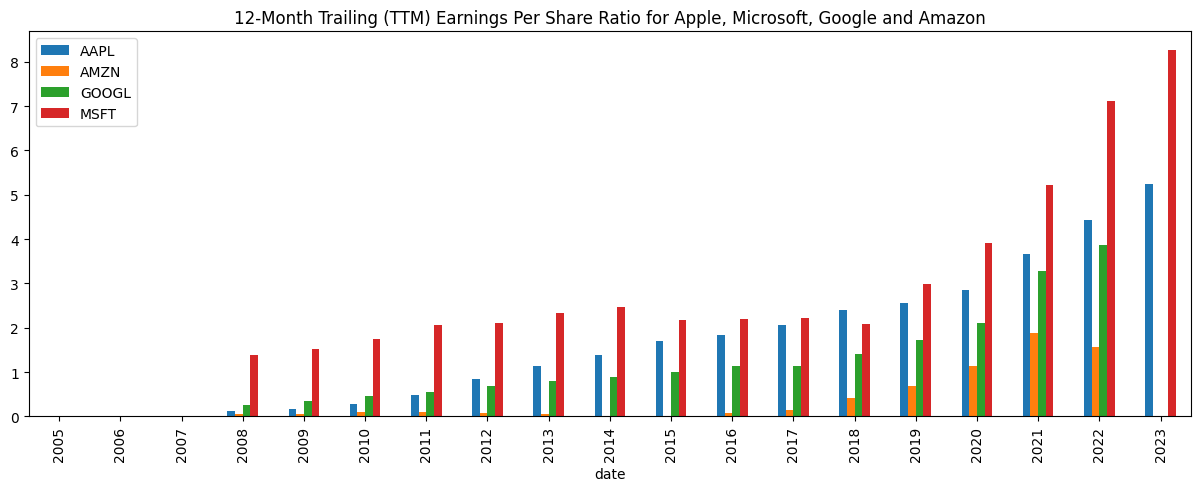

In [27]:
ratios.get_earnings_per_share(trailing=4).T.plot.bar(
    figsize=(15, 5),
    title="12-Month Trailing (TTM) Earnings Per Share Ratio for Apple, Microsoft, Google and Amazon",
)

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Models-Module) to find all the available models.

In [28]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [29]:
models.get_extended_dupont_analysis()

date                            2005   2006   2007   2008   2009   2010  \
AAPL  Interest Burden Ratio   0.9091 0.8705 0.8804 0.9101 0.9592 0.9916   
      Tax Burden Ratio        0.8091 0.8108 0.7929 0.7704 0.7448 0.7622   
      Operating Profit Margin 0.1303 0.1459 0.2086 0.2123 0.2185 0.2842   
      Asset Turnover             NaN 1.3434 1.1283 1.0006 0.7822  1.011   
      Equity Multiplier          NaN 1.6479 1.7357 1.8255  1.912 1.7063   
      Return on Equity           NaN  0.228 0.2852 0.2719 0.2335 0.3706   
AMZN  Interest Burden Ratio   1.0093 1.0318 0.9924 0.9345 0.9724 0.9392   
      Tax Burden Ratio        0.7708 0.4884 0.7267  0.766 0.7989 0.8193   
      Operating Profit Margin 0.0504 0.0352 0.0445  0.047 0.0474 0.0438   
      Asset Turnover             NaN 2.6581 2.7351 2.5902 2.2153 2.0978   
      Equity Multiplier          NaN 11.904 6.6634  3.825 2.7906 2.6904   
      Return on Equity           NaN 0.5613 0.5848 0.3334 0.2275 0.1901   
GOOGL Interest Burden Ratio   0.9419 0.8851 0.8961  1.133 0.9918 0.9616   
      Tax Burden Ratio        0.7264 0.8669 0.8268 0.6373 0.7844 0.8193   
      Operating Profit Margin 0.3489 0.3782 0.3419 0.2686 0.3544 0.3682   
      Asset Turnover             NaN 0.7379 0.7576 0.7634 0.6546 0.5963   
      Equity Multiplier          NaN 1.0864 1.1027 1.1212 1.1249 1.1958   
      Return on Equity           NaN 0.2326 0.2116  0.166  0.203 0.2068   
MSFT  Interest Burden Ratio   0.8757  0.902 0.9215 0.9445 1.0273 0.9634   
      Tax Burden Ratio        0.8416 0.7649 0.7593 0.7861 0.7155 0.7785   
      Operating Profit Margin 0.4179 0.4124 0.3932 0.3941 0.3392 0.4003   
      Asset Turnover             NaN 0.6307 0.7701 0.8888 0.7756  0.762   
      Equity Multiplier          NaN 1.5916 1.8647 2.0178 1.9867 1.9129   
      Return on Equity           NaN 0.2856 0.3951 0.5248 0.3842 0.4376   

date                            2011    2012   2013    2014   2015   2016  \
AAPL  Interest Burden Ratio   0.9879  0.9906 1.0065  0.9817 0.9823 1.0195   
      Tax Burden Ratio        0.7672  0.7555 0.7337  0.7525 0.7496 0.7302   
      Operating Profit Margin  0.316  0.3563 0.2935  0.2926 0.3103 0.2846   
      Asset Turnover          1.1302  1.0704 0.8923  0.8331 0.8949 0.7045   
      Equity Multiplier       1.5397   1.501 1.5845  1.8666 2.2621 2.4724   
      Return on Equity        0.4167  0.4284 0.3064  0.3361 0.4625  0.369   
AMZN  Interest Burden Ratio   0.9229  1.7378 1.7126 -2.4054 1.4444 1.1027   
      Tax Burden Ratio         0.732 -0.0577 0.3678 -1.3539 0.2669 0.5664   
      Operating Profit Margin 0.0194  0.0064 0.0058 -0.0008 0.0144 0.0279   
      Asset Turnover          2.1816  2.1127 2.0478  1.8801 1.7842 1.8272   
      Equity Multiplier       3.0145  3.6261 4.0536  4.6207  4.972 4.5562   
      Return on Equity        0.0863 -0.0049 0.0305 -0.0235 0.0494 0.1452   
GOOGL Interest Burden Ratio   0.9526  0.9532 0.9634  0.9558 0.9852  0.982   
      Tax Burden Ratio        0.8292  0.8415 0.9251  0.8756 0.8444 0.8213   
      Operating Profit Margin 0.3252  0.2668 0.2423  0.2615 0.2621 0.2675   
      Asset Turnover          0.5813  0.6032 0.5845  0.5453 0.5383 0.5732   
      Equity Multiplier       1.2494  1.2812 1.2873  1.2619 1.2391 1.2143   
      Return on Equity        0.1866  0.1654 0.1625  0.1506 0.1454 0.1502   
MSFT  Interest Burden Ratio   0.9676  0.9774 1.0164  1.0024 1.5222 1.3765   
      Tax Burden Ratio        0.8523  0.7801 0.7951  0.7916 0.4328 0.6178   
      Operating Profit Margin 0.4013   0.302 0.3475  0.3204 0.1978 0.2167   
      Asset Turnover           0.718  0.6411 0.5904  0.5516 0.5369 0.4928   
      Equity Multiplier       1.8867   1.863 1.8148  1.8658 2.0522 2.4324   
      Return on Equity        0.4484  0.2751 0.3009  0.2617 0.1436 0.2209   

date                            2017   2018   2019   2020   2021    2022  \
AAPL  Interest Burden Ratio   0.9572 0.9725 0.9725  0.988 0.9976  1.0028   
      Tax Burden Ratio        0.7882 0.8397 0.

Showing the growth is possible with the `growth=True` parameter which also includes a lag parameter in which 1 is the default. It is also possible to define multiple lags. As an example:

In [30]:
models.get_enterprise_value_breakdown(growth=True, lag=[1, 2, 3])

2005   2006   2007    2008    2009  \
AAPL Share Price               Lag 1   NaN 0.1789 1.3346   -0.57  1.4729   
                               Lag 2   NaN    NaN 1.7523  0.0039  0.0633   
                               Lag 3   NaN    NaN    NaN  0.1835  1.4825   
     Market Capitalization     Lag 1   NaN 0.2073 1.3659 -0.5638  1.4862   
                               Lag 2   NaN    NaN 1.8564   0.032  0.0845   
...                                    ...    ...    ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2   NaN    NaN 0.2597  0.5399 -0.0057   
                               Lag 3   NaN    NaN    NaN  1.1313  -0.095   
     Enterprise Value          Lag 1   NaN 0.1119 0.1413 -0.4956  0.6465   
                               Lag 2   NaN    NaN 0.2691 -0.4243 -0.1695   
                               Lag 3   NaN    NaN    NaN -0.3598 -0.0521   

                                        2010    2011    2012    2013    2014  \
AAPL Share Price               Lag 1  0.5313  0.2549  0.3254  0.0812  0.4058   
                               Lag 2  2.7868  0.9216  0.6633  0.4331    0.52   
                               Lag 3  0.6283  3.7519   1.547  0.7984  1.0147   
     Market Capitalization     Lag 1  0.5612  0.2711  0.3378  0.0656  0.3198   
                               Lag 2  2.8816  0.9844  0.7004  0.4255  0.4063   
...                                      ...     ...     ...     ...     ...   
MSFT Cash and Cash Equivalents Lag 2 -0.4676  0.5816  0.2603 -0.6042  0.2495   
                               Lag 3 -0.0992 -0.0705  0.1419  -0.309 -0.0979   
     Enterprise Value          Lag 1 -0.0689 -0.0712  0.0619   0.461  0.2615   
                               Lag 2   0.533 -0.1352 -0.0137  0.5514   0.843   
                               Lag 3 -0.2267  0.4239 -0.0817  0.4409   0.957   

                                        2015    2016   2017    2018   2019  \
AAPL Share Price               Lag 1   -0.03  0.1248 0.4846  -0.054 0.8896   
                               Lag 2  0.3637  0.0911 0.6699  0.4045 0.7876   
                               Lag 3  0.4745  0.5339 0.6198  0.5797 1.6538   
     Market Capitalization     Lag 1 -0.0822  0.0679 0.4175 -0.0993 0.7568   
                               Lag 2  0.2113 -0.0198 0.5138  0.2767 0.5824   
...                                      ...     ...    ...     ...    ...   
MSFT Cash and Cash Equivalents Lag 2  0.4708  -0.249 0.3696   0.835 0.4819   
                               Lag 3 -0.1936  0.7114 -0.116  1.1351 0.7444   
     Enterprise Value          Lag 1  0.2423  0.1494 0.4027  0.1672 0.5156   
                               Lag 2  0.5672  0.4279 0.6122  0.6372  0.769   
                               Lag 3  1.2897  0.8013 1.0029  0.8817 1.4814   

                                       2020   2021    2022   2023  
AAPL Share Price               Lag 1 0.8231 0.3464  -0.264 0.4801  
                               Lag 2 2.4449 1.4547  -0.009 0.0893  
                               Lag 3 2.2589 3.6383  0.8066 0.4667  
     Market Capitalization     Lag 1 0.7185 0.2955 -0.2875 0.4335  
                               Lag 2 2.0191 1.2262  -0.077 0.0213  
...                                     ...    ...     ...    ...  
MSFT Cash and Cash Equivalents Lag 2 0.1364 0.2526  0.0261 1.4398  
                               Lag 3 0.7716 0.1907  0.2268 1.5563  
     Enterprise Value          Lag 1 0.3825 0.4907 -0.2831 0.5116  
                               Lag 2 1.0954 1.0609  0.0686 0.0837  
                               Lag 3 1.4457 2.1235  0.4774 0.6154  

[84 rows x 19 columns]

Other than that, there are many other models such as the Altman Z-Score and Piotroski F-Score.

In [31]:
models.get_altman_z_score()

2005    2006    2007    2008  \
AAPL  Working Capital to Total Assets     0.5901  0.4672  0.4993  0.5205   
      Retained Earnings to Total Assets   0.3467  0.3259  0.3591  0.3499   
      EBIT to Total Assets                0.1428  0.1426  0.1739  0.1586   
      Market Value to Total Liabilities  12.8039  8.7449 13.8142  3.5148   
      Sales to Total Assets                1.206  1.1226  0.9471  0.8208   
      Altman Z-Score                     10.5533  7.8569 10.9116  4.5673   
MSFT  Working Capital to Total Assets     0.4499  0.3817  0.2598  0.1835   
      Retained Earnings to Total Assets  -0.1938 -0.2892 -0.4925 -0.3806   
      EBIT to Total Assets                0.2348  0.2624  0.3182  0.3271   
      Market Value to Total Liabilities    8.893  7.6555  7.9861   3.738   
      Sales to Total Assets               0.5619  0.6363  0.8093    0.83   
      Altman Z-Score                      6.9411  6.1486  6.2732  3.8398   
GOOGL Working Capital to Total Assets     0.8037  0.6353  0.6021  0.5627   
      Retained Earnings to Total Assets   0.2001  0.2779  0.3684  0.4269   
      EBIT to Total Assets                0.2085  0.2171   0.224  0.1965   
      Market Value to Total Liabilities 142.0944 99.5037 82.6934 27.7139   
      Sales to Total Assets               0.5976  0.5741   0.655  0.6861   
      Altman Z-Score                      87.787 62.1441 52.2485 19.2359   
AMZN  Working Capital to Total Assets     0.2706  0.1928  0.2236  0.1697   
      Retained Earnings to Total Assets  -0.5484  -0.421  -0.212 -0.0878   
      EBIT to Total Assets                0.1407  0.1043  0.1136  0.1158   
      Market Value to Total Liabilities   5.8282  4.2486  7.4248  3.9203   
      Sales to Total Assets               2.2971   2.455  2.2876  2.3053   
      Altman Z-Score                      5.8151  4.9901   7.089  5.1204   

                                           2009    2010    2011   2012  \
AAPL  Working Capital to Total Assets    0.3154  0.2787  0.1462 0.1085   
      Retained Earnings to Total Assets  0.3628  0.4944    0.54 0.5753   
      EBIT to Total Assets               0.1422  0.2445  0.2904 0.3138   
      Market Value to Total Liabilities  6.2273   9.235  8.0876 7.4349   
      Sales to Total Assets              0.6785  0.8675  0.9302 0.8889   
      Altman Z-Score                     5.7705  8.2421  7.6725 7.3209   
MSFT  Working Capital to Total Assets    0.2856  0.3429  0.4245 0.4321   
      Retained Earnings to Total Assets  -0.293 -0.1937 -0.0582 0.0047   
      EBIT to Total Assets               0.2545  0.2922  0.2609 0.1867   
      Market Value to Total Liabilities  5.4262  4.8303  3.4341 3.3818   
      Sales to Total Assets              0.7503  0.7256  0.6434 0.6079   
      Altman Z-Score                     4.7783  4.7284  3.9929 3.7782   
GOOGL Working Capital to Total Assets    0.6524  0.5456  0.6041 0.4917   
      Retained Earnings to Total Assets  0.4959  0.4817  0.5182 0.5154   
      EBIT to Total Assets               0.2126  0.1966  0.1706 0.1431   
      Market Value to Total Liabilities 44.1382 16.5496 14.6587 10.654   
      Sales to Total Assets               0.584  0.5068  0.5223 0.5349   
      Altman Z-Score                    29.2457 12.4146  11.331  8.711   
AMZN  Working Capital to Total Assets    0.1761  0.1795  0.1026 0.0705   
      Retained Earnings to Total Assets  0.0125  0.0704  0.0773 0.0589   
      EBIT to Total Assets               0.0861  0.0821   0.039 0.0148   
      Market Value to Total Liabilities  6.9534  6.8784  4.5519 4.6633   
      Sales to Total Assets              1.7743  1.8197  1.9019 1.8766   
      Altman Z-Score                     6.4592  6.5317  4.9933 4.8903   

                                           2013    2014    2015    2016  \
AAPL  Working Capital to Total Assets    0.1431  0.0219  0.0302  0.0866   
      Retained Earnings to Total Assets  0.5037  0.3759  0.3177  0.2996   
      EBIT to Total Assets                0.243  0.2323  0.2522  0.

In [32]:
models.get_piotroski_score()

date                                       2006  2007  2008  2009  2010  2011  \
AAPL  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     0     1     0   
      Accruals Criteria                       0     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     0   
      Change in Current Ratio Criteria        0     1     1     0     1     0   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria                   0     1     1     1     1     1   
      Asset Turnover Criteria                 0     0     0     0     1     1   
      Piotroski Score                         2     5     5     4     7     5   
MSFT  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     1     0     1     0   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     1     0   
      Change in Current Ratio Criteria        0     0     0     1     1     1   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria                   0     0     1     0     1     0   
      Asset Turnover Criteria                 0     1     1     0     0     0   
      Piotroski Score                         3     4     6     4     7     4   
GOOGL Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     1     0     0   
      Accruals Criteria                       0     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     1   
      Change in Current Ratio Criteria        0     0     1     1     0     1   
      Number of Shares Criteria               0     0     1     1     1     1   
      Gross Margin Criteria                   1     0     1     1     1     1   
      Asset Turnover Criteria                 0     1     1     0     0     0   
      Piotroski Score                         3     4     7     7     5     7   
AMZN  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     0     0     0     0   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             1     1     1     1     0     0   
      Change in Current Ratio Criteria        0     1     0     1     0     0   
      Number of Shares Criteria               1     1     1     1     1     1   
      Gross Margin Criteria                   0     1     0     1     0     0   
      Asset Turnover Criteria                 0     1     0     0     0     1   
      Piotroski Score                         5     8     5     7     4     5   

date                                       2012  2013  2014  2015  2016  2017  \
AAPL  Return on Assets Criteria               1     1     1     1     1     1   
      Operating Cashflow Criteria             1     1     1     1     1     1   
      Change in Return on Assets Criteria     0     0     1     1     0     1   
      Accruals Criteria                       1     1     1     1     1     1   
      Change in Leverage Criteria             0     0     0     0     0     0   
      Change in Current Ratio Criteria        0     1     0     1     1     0   
      Number of Shares Criteria               0     0     0     0     0     0   
      Gross Margin Criteria   

# The Performance Module

The Performance module is meant to calculate important performance metrics such as Sharpe Ratio, Sortino Ratio, Treynor Ratio, Information Ratio, Jensen's Alpha, Beta, Capital Asset Pricing Model and more. Find the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs/performance) which includes an explanation about the performance metric, the parameters and an example.

In [33]:
performance = companies.performance

/Users/jeroenbouma/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/Users/jeroenbouma/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


The metrics found here are really about understanding how well a stock (or portfolio) is performing often as opposed to a benchmark (as defined within the Toolkit class, by default this is the S&P 500). It helps in understanding whether the stock is worth the risk and whether it is worth the investment. For example, by looking at Jensen's Alpha.

In [34]:
performance.get_jensens_alpha()

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2005,1.1853,-0.0563,1.106,0.0183
2006,-0.0433,0.0243,-0.0927,-0.4177
2007,1.2812,0.1579,0.4522,1.2954
2008,-0.2346,-0.1016,-0.232,-0.0279
2009,1.2301,0.3617,0.7793,1.391
2010,0.374,-0.2032,-0.1936,0.1747
2011,0.236,-0.0642,0.0686,-0.0578
2012,0.1304,-0.1188,-0.0442,0.2733
2013,-0.131,0.1531,0.279,0.1884


Jensen's Alpha uses the Capital Asset Pricing Model (CAPM) to calculate whether the stock is outperforming the benchmark. This is also a separate function.

In [35]:
performance.get_capital_asset_pricing_model(show_full_results=True, period="quarterly")

,Risk Free Rate,Beta AAPL,Beta MSFT,Beta GOOGL,Beta AMZN,Benchmark Returns,CAPM AAPL,CAPM MSFT,CAPM GOOGL,CAPM AMZN
Date,,,,,,,,,,
2005Q1,0.045,1.2142,0.5877,0.8566,1.2718,-0.0203,-0.0343,0.0066,-0.0109,-0.038
2005Q2,0.0395,2.5563,0.9578,0.8313,0.6253,0.0144,-0.0247,0.0155,0.0186,0.0238
2005Q3,0.0433,1.6397,0.7083,0.0213,2.2254,0.0369,0.0328,0.0388,0.0432,0.0291
2005Q4,0.0439,1.1416,0.7648,1.3713,1.4735,0.0173,0.0135,0.0236,0.0074,0.0047
2006Q1,0.0485,2.1286,0.9374,2.4748,1.1589,0.0469,0.0451,0.047,0.0445,0.0466
...,...,...,...,...,...,...,...,...,...,...
2022Q4,0.0388,1.4588,1.4665,1.351,1.5229,0.0756,0.0925,0.0928,0.0885,0.0948
2023Q1,0.0349,1.1281,1.2233,1.5442,1.649,0.0746,0.0797,0.0835,0.0962,0.1004
2023Q2,0.0382,1.2101,1.2919,1.0276,1.2033,0.0868,0.097,0.101,0.0881,0.0967


**The beauty of this class is that you can view the performance metrics on a weekly, monthly, quarterly or yearly interval.** Here, if for example the variance needs to be calculated, it intelligently calculates the variance for the days within each week, month, quarter or year. This is also the case for the standard deviation and other metrics. E.g. you can view the 12-month rolling Sharpe Ratio as follows:

<Axes: title={'center': '12-Month Rolling Sharpe Ratio'}, xlabel='Date'>

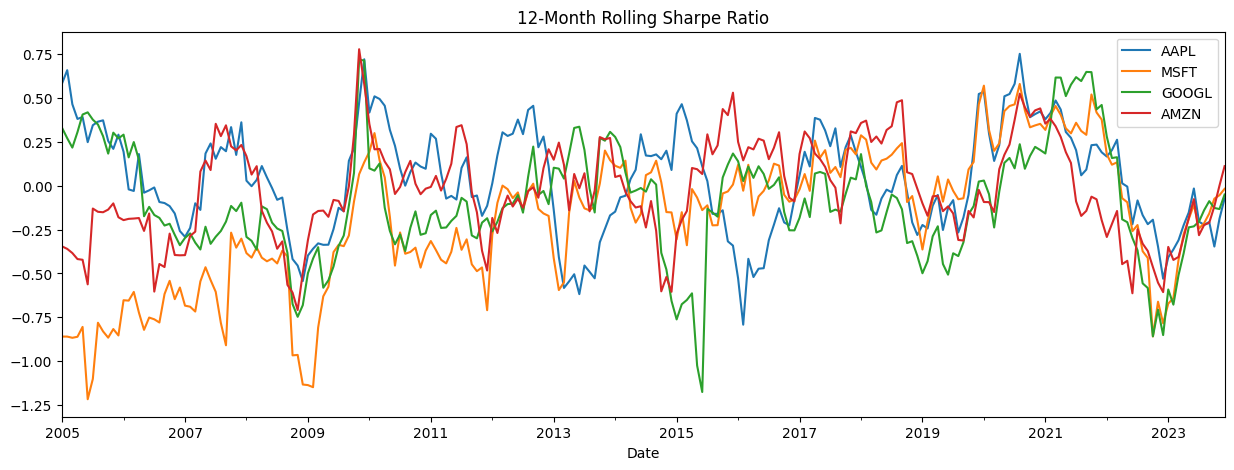

In [36]:
performance.get_sharpe_ratio(period="monthly", rolling=12).plot(
    figsize=(15, 5), title="12-Month Rolling Sharpe Ratio"
)

With the various already prepared period datasets, it also becomes possible to calculate Factor Exposures via the Fama and French 5 Factor Model over a lengthy period. This performs a Linear Regression on each stock for each period and determines the regression parameters. With this you can determine how the stock returns move according to different anomalies in the market. These factors are:

- **Market Risk Premium (Mkt-RF):** Represents the additional return that investors expect to earn for taking on the risk of investing in the overall market as opposed to a risk-free asset. This relates to CAPM's Beta but is a more generalized approach in which CAPM calculates based on a benchmark of your choosing.
- **Size Premium (SMB):** Reflects the historical excess return of small-cap stocks over large-cap stocks.
- **Value Premium (HML):** Captures the historical excess return of value stocks over growth stocks.
- **Profitability (RMW):** Measures the historical excess return of high profitability stocks over low profitability stocks.
- **Investment (CMA):** Quantifies the historical excess return of low investment stocks over high investment stocks.

**It is possible to do a Simple Linear Regression for each factor and a Multi Linear Regression for all factors with the dependent variable being the stock returns. The latter is the default.**

In [37]:
fama_and_french = performance.get_fama_and_french_model(
    period="yearly", method="simple"
)

# Show the Fama and French 5 Factor Model Results
fama_and_french

Calculating Individual Factor Exposures: 100%|██████████| 4/4 [00:57<00:00, 14.39s/it]


AAPL                                                        \
        Mkt-RF                                                         
     Intercept   Slope R Squared P Value Standard Error Factor Value   
2005    0.1147 12.3164    0.2096     0.0         1.5128         -0.5   
2006    0.2453 11.5654    0.1761     0.0         1.5852        -0.51   
2007    0.3111 20.9021    0.2588     0.0         2.2416        -0.65   
2008    0.2633 46.9469    0.4647     0.0         3.1807          1.7   
2009   -0.0799 56.6579    0.4965     0.0         3.6089        -0.99   
2010    0.0175 48.9801    0.5033     0.0         3.0773         -0.1   
2011    -0.047 62.7319    0.4623     0.0         4.2785         -0.4   
2012    0.0341  24.182    0.2947     0.0         2.3757         1.71   
2013    0.1175  9.6869    0.0591  0.0001         2.4437         0.44   
2014    0.0125 23.6684    0.1846     0.0          3.146        -0.93   
2015    0.0043 37.9386    0.4347     0.0          2.736        -0.92   
2016     0.062 32.7936    0.3104     0.0         3.0913        -0.52   
2017      0.11 19.5805    0.2323     0.0         2.2561        -0.57   
2018    0.2971 44.3384    0.5566     0.0          2.508          0.9   
2019    0.3115 36.3083    0.5328     0.0         2.1505         0.28   
2020    0.0322  60.432    0.6828     0.0         2.5998         0.39   
2021    0.0387 37.3834    0.4471     0.0         2.6292        -0.31   
2022    0.2993 57.7444    0.7102     0.0         2.3378        -0.22   
2023    0.8081 44.7827    0.4913     0.0          3.167         0.63   

                                            ...           AMZN               \
                     SMB                    ...            RMW                
     Residuals Intercept   Slope R Squared  ... Standard Error Factor Value   
2005    7.2799    0.0375  4.7209    0.0715  ...         0.7962        -0.09   
2006     5.832    0.0793  4.0303    0.0375  ...         0.5833        -0.11   
2007   14.6098   -0.0233  0.5601     0.001  ...         0.4285         -0.3   
2008  -80.6431    0.0196  0.0061       0.0  ...         0.8944        -0.67   
2009   57.6441    -0.001  9.4008    0.0746  ...         0.8657        -0.47   
2010    5.4118    0.0336 14.1912    0.1664  ...         1.0272        -0.12   
2011   25.3947    -0.029 16.6298    0.1772  ...         1.2113        -0.04   
2012  -41.0598   -0.0037   3.372    0.0217  ...         0.9365         0.12   
2013   -4.2985    0.0235  3.0273    0.0193  ...         0.8884        -0.04   
2014   22.4049   -0.0308  2.9096    0.0054  ...         0.9374        -0.13   
2015   34.8692   -0.0228 -3.8724    0.0182  ...         0.8845        -0.11   
2016   17.1155    0.0349  4.7357    0.0156  ...         1.3106        -0.11   
2017   11.5355   -0.0174  0.7857    0.0003  ...         1.4035         0.17   
2018  -40.2557    -0.035 -1.8494    0.0042  ...         0.9876        -0.09   
2019   -9.5882    0.0023  3.4808    0.0134  ...         1.4108        -0.12   
2020  -22.7775     0.027   -3.65    0.0102  ...         1.4982         0.57   
2021   11.8966    0.0046 -3.2425    0.0034  ...         3.0221         0.36   
2022   12.1405    0.0065  1.4591    0.0035  ...          1.556        -0.54   
2023  -28.5411   -0.0617  -0.626    0.0002  ...         1.5283        -0.83   

                                                                    \
                     CMA                                             
     Residuals Intercept    Slope R Squared P Value Standard Error   
2005    -0.015   -0.0271  -0.7629    0.0101  0.1119         0.4782   
2006   -0.3122    0.0165  -0.7092    0.0073  0.1758         0.5223   
2007    1.4264   -0.0458  -1.1812    0.0258  0.0109         0.4603   
2008   -2.2009   -0.0046  -2.7239    0.0719     0.0         0.6179   
2009    0.6686    0.0052  -2.2262    0.0559  0.0002         0.5786   
2010   -0.4262    0.0319   3.3119    0.0591  0.0001         0.8354   
2011   -0.3764   -0.0058  -2.6698    0.0565  0.0001     

With these calculated, it is possible to plot the R-squared over time to show the explanatory power of each factor for each stock.

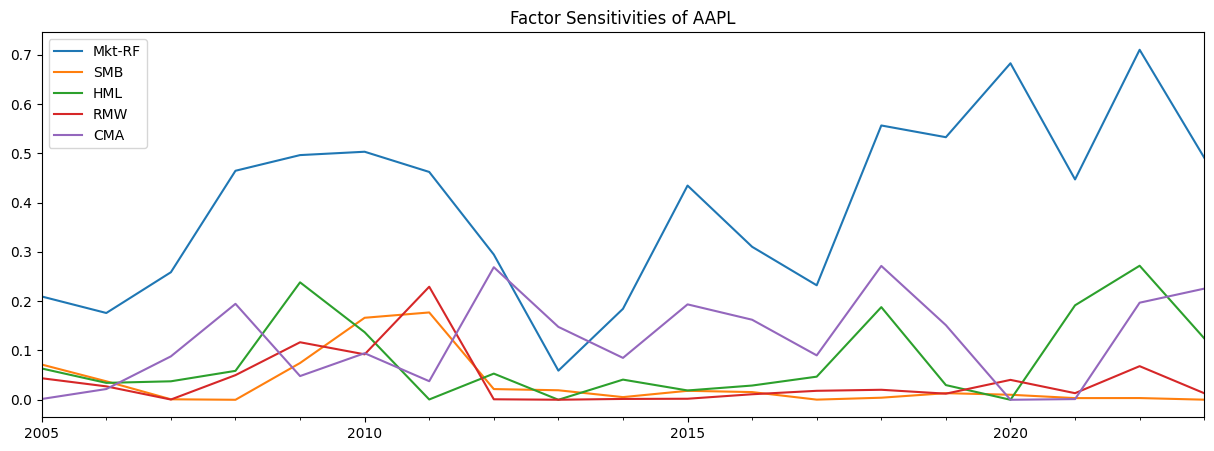

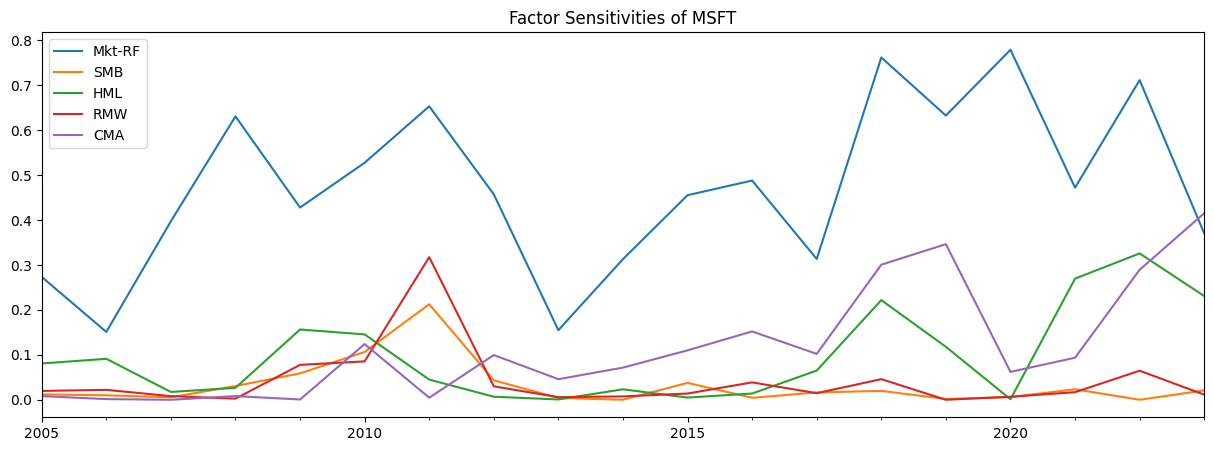

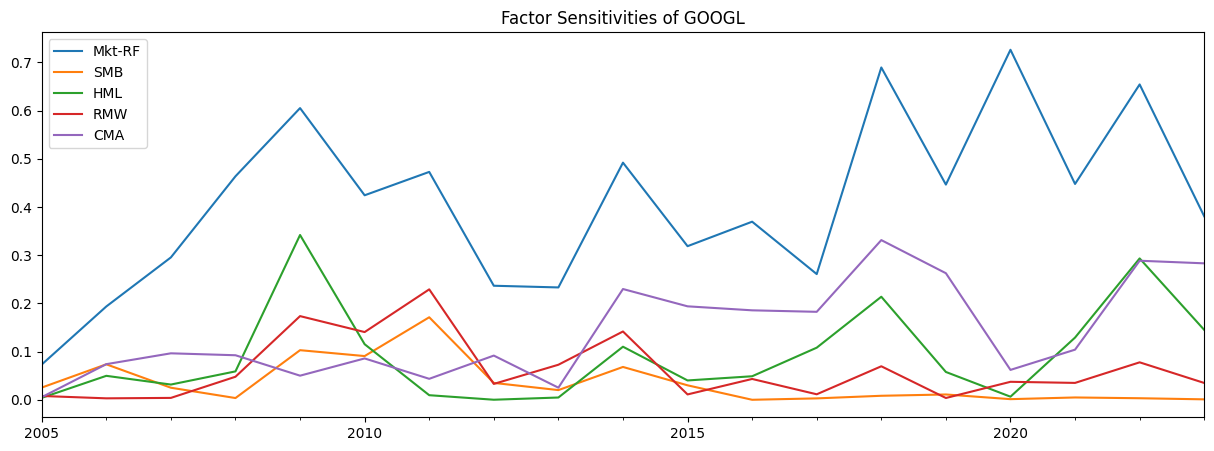

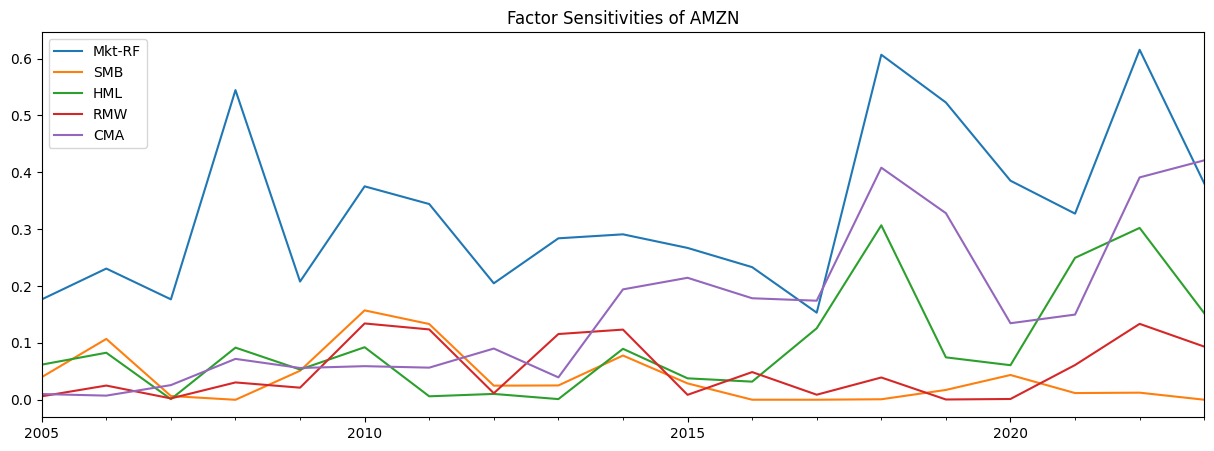

In [38]:
for ticker in companies._tickers:
    fama_and_french[ticker].xs("R Squared", level=1, axis=1).plot(
        figsize=(15, 5), title=f"Factor Sensitivities of {ticker}"
    )

Correlations between factors and factors and asset returns can also be shown with `performance.get_factor_correlations` and `performance.get_factor_asset_correlations` respectively.

In [39]:
performance.get_factor_asset_correlations(period="quarterly")

Calculating Factor Asset Correlations:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Factor Asset Correlations: 100%|██████████| 4/4 [00:20<00:00,  5.14s/it]


AAPL                                   MSFT                          \
       Mkt-RF     SMB     HML     RMW     CMA Mkt-RF     SMB     HML     RMW   
2005Q1 0.3201  0.1455 -0.2091  -0.274  0.0426 0.5627 -0.0687 -0.3971 -0.0785   
2005Q2  0.686  0.4483 -0.1824 -0.2825  0.0738  0.629  0.1781 -0.4152 -0.1025   
2005Q3 0.4597  0.2291 -0.4486 -0.1307 -0.1129   0.41  0.0166 -0.3986 -0.4072   
2005Q4 0.3439  0.2682 -0.3142  -0.179 -0.2619  0.583  0.3005   0.026  0.0058   
2006Q1 0.4898 -0.0045 -0.1509  -0.298 -0.1729 0.5464 -0.0175 -0.3764 -0.3181   
...       ...     ...     ...     ...     ...    ...     ...     ...     ...   
2022Q4 0.8999  0.2311 -0.5966 -0.1869 -0.5947 0.8964   0.133 -0.5627 -0.1454   
2023Q1 0.7735  0.1606  -0.377 -0.2282 -0.5705 0.6644 -0.0048 -0.5677 -0.2748   
2023Q2 0.7414 -0.1164 -0.2715  0.0097 -0.4739 0.5393 -0.1627 -0.4537 -0.0929   
2023Q3  0.606  0.0132 -0.2412 -0.0987 -0.2681 0.6221 -0.2648 -0.3111 -0.0038   
2023Q4 0.6579 -0.5732 -0.6052  0.0358 -0.7603 0.5228 -0.3585 -0.3741  0.2324   

                GOOGL                                   AMZN                  \
           CMA Mkt-RF     SMB     HML     RMW     CMA Mkt-RF     SMB     HML   
2005Q1 -0.0284 0.2657  0.2516 -0.1182 -0.2358  0.2235 0.3671  0.1221  -0.288   
2005Q2 -0.0707  0.274  0.0887  0.0514  0.0468 -0.1864 0.4211  0.2935 -0.0331   
2005Q3 -0.0959 0.0663  0.0327  -0.334 -0.2586 -0.0515 0.5178  0.1923 -0.4229   
2005Q4 -0.2361 0.4093  0.2036  0.0544  0.0337 -0.3569 0.4409  0.2363 -0.2213   
2006Q1 -0.2746 0.5654  0.2607 -0.0397 -0.0049 -0.3212 0.4332  0.0772 -0.0855   
...        ...    ...     ...     ...     ...     ...    ...     ...     ...   
2022Q4 -0.5949 0.8051  0.1381 -0.5822 -0.1097 -0.5855 0.7924  0.2857 -0.6564   
2023Q1 -0.6797 0.6731  0.2035 -0.4906 -0.2213 -0.6536  0.723  0.2762 -0.5258   
2023Q2  -0.574 0.4262  -0.186 -0.3573 -0.0042 -0.4747 0.4432 -0.1173   -0.46   
2023Q3 -0.7684 0.6263 -0.1423 -0.0622 -0.1469 -0.4091  0.583 -0.1399 -0.0016   
2023Q4 -0.5073  0.693 -0.2045 -0.5169 -0.4165 -0.4075 0.6433 -0.2504  -0.406   

                        
           RMW     CMA  
2005Q1 -0.2356   0.145  
2005Q2  -0.206 -0.0803  
2005Q3 -0.0196 -0.2031  
2005Q4  0.1255 -0.3436  
2006Q1 -0.1007 -0.0968  
...        ...     ...  
2022Q4 -0.3434 -0.7933  
2023Q1 -0.4452 -0.7295  
2023Q2  -0.192 -0.5917  
2023Q3  -0.257 -0.6093  
2023Q4 -0.2556 -0.6756  

[76 rows x 20 columns]

# The Risk Module

The Risk module is meant to calculate important risk metrics such as Value at Risk (VaR), Conditional Value at Risk (cVaR), Maximum Drawdown, Correlations, Beta, GARCH, EWMA and more. Find the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs/risk) which includes an explanation about the risk metrics, the parameters and an example.

In [40]:
risk = companies.risk

An important measurement is that of Value at Risk (VaR) and Conditional Value at Risk (cVaR) in which the former is the maximum loss that can be expected with a certain probability (e.g. 95%) and the latter is the expected loss given that the loss is greater than the VaR. Understanding the potential tail risk you take is crucial for any investment.

The conditional Value at Risk can be explained as the expected loss on a day within the chosen period.

In [41]:
risk.get_conditional_value_at_risk(period="weekly")

,AAPL,MSFT,GOOGL,AMZN,Benchmark
2003-12-29/2004-01-04,NaN,NaN,NaN,NaN,NaN
2004-01-05/2004-01-11,-0.0154,-0.0176,NaN,-0.0346,-0.0088
2004-01-12/2004-01-18,-0.0558,-0.0058,NaN,-0.0071,-0.0059
2004-01-19/2004-01-25,-0.019,-0.0102,NaN,-0.0071,-0.0033
2004-01-26/2004-02-01,-0.0238,-0.0192,NaN,-0.0681,-0.0115
...,...,...,...,...,...
2023-11-06/2023-11-12,-0.0026,-0.0069,-0.0121,-0.0104,-0.0078
2023-11-13/2023-11-19,-0.0086,-0.0168,-0.0118,-0.0178,-0.001
2023-11-20/2023-11-26,-0.007,-0.0116,-0.013,-0.0153,-0.0022
2023-11-27/2023-12-03,-0.0054,-0.0116,-0.0182,-0.0048,-0.0018


Or find the Maximum Drawdown that can occur in a given period.

<Axes: title={'center': 'Maximum Drawdown'}>

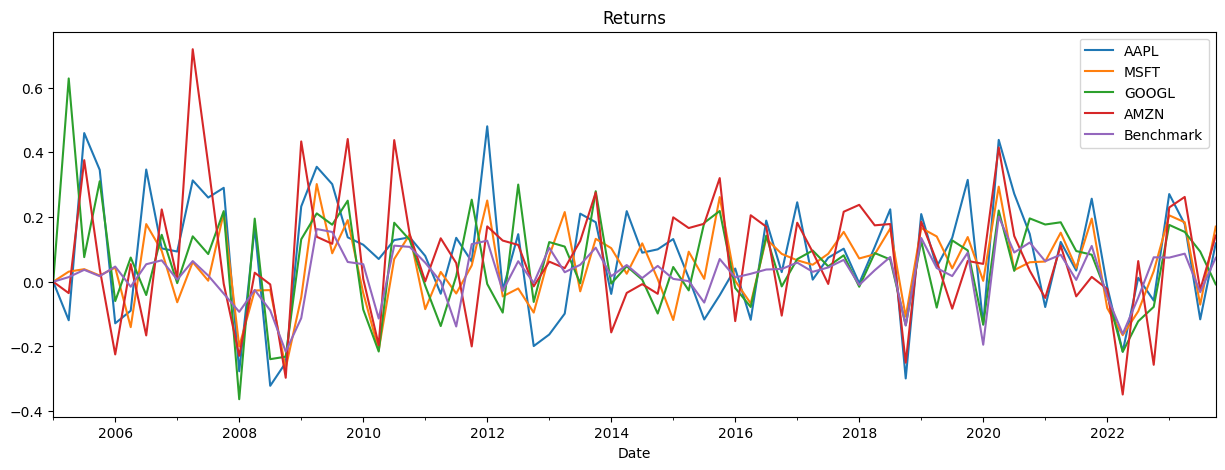

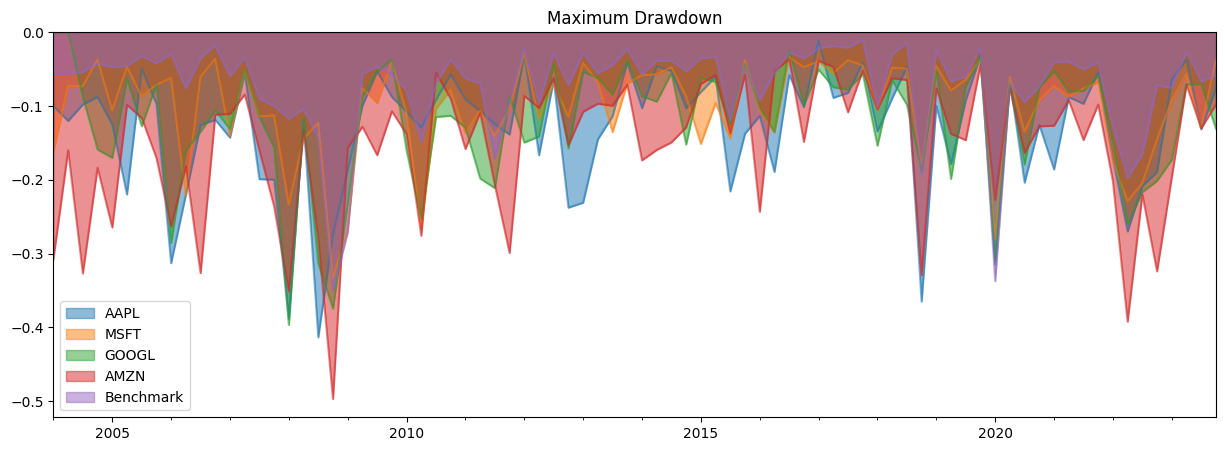

In [42]:
companies.get_historical_data(period="quarterly")["Return"].plot(
    figsize=(15, 5), title="Returns"
)
risk.get_maximum_drawdown(period="quarterly").plot.area(
    stacked=False, figsize=(15, 5), title="Maximum Drawdown"
)

# The Technicals Module

After initialization of `Toolkit`, you can get access to the Technicals module which includes a variety of well-known technical indicators. This can be done by calling the `technicals` property. Please view the documentation [here](https://www.jeroenbouma.com/projects/financetoolkit/docs#Technical-Module) to find all the available indicators.

In [43]:
technicals = companies.technicals

Some of the technical indicators you can find here are for example a collection of breadth indicators.

In [44]:
technicals.collect_breadth_indicators()

McClellan Oscillator                       Advancers - Decliners  \
                           AAPL    MSFT  GOOGL   AMZN                  AAPL   
Date                                                                          
2005-01-03               0.0432   0.218 0.2439 0.1102                 0.958   
2005-01-04               0.0412  0.2047 0.2423 0.1108                0.9679   
2005-01-05               0.0397  0.1902 0.2382 0.1098                0.9764   
2005-01-06               0.0382  0.1759 0.2274 0.1064                0.9771   
2005-01-07               0.0404  0.1603 0.2237 0.1064                  1.05   
...                         ...     ...    ...    ...                   ...   
2023-11-28               3.5587 12.5424 0.9707 4.9766                 190.4   
2023-11-29               3.5541 12.5352 0.9439 4.9323                189.37   
2023-11-30               3.5614 12.4694 0.7933 4.8582                189.95   
2023-12-01               3.6143 12.1308  0.627 4.8176                191.24   
2023-12-04              -5.9206 11.4951 0.3797 4.6695                   0.0   

                                 On-Balance Volume                             \
             MSFT  GOOGL    AMZN              AAPL         MSFT         GOOGL   
Date                                                                            
2005-01-03   18.7   5.07    2.23     31464305600.0   80392900.0  6334415244.0   
2005-01-04  18.76   4.87    2.11     32561116000.0  189835000.0  5784729480.0   
2005-01-05  18.72   4.84    2.09     33241549600.0  117371500.0  5455594944.0   
2005-01-06   18.7   4.72    2.05     33947104800.0   40481000.0  5040526428.0   
2005-01-07  18.65   4.85    2.12     36174555200.0  -28242300.0  5426655912.0   
...           ...    ...     ...               ...          ...           ...   
2023-11-28  382.7  137.2  147.03    101902769255.0 1054695777.0 29154050234.0   
2023-11-29 378.85 134.99  146.32    101859755031.0 1025732378.0 29130101012.0   
2023-11-30 378.91 132.53  146.09    101908499397.0 1056277673.0 29091112749.0   
2023-12-01 374.51 131.86  147.03    101949874641.0 1023334348.0 29060816671.0   
2023-12-04  368.8 129.82 145.245               NaN 1022963083.0 29060389192.0   

                         Accumulation/Distribution Line                     \
                    AMZN                           AAPL               MSFT   
Date                                                                         
2005-01-03  -215420000.0             -1233984995622.589 -884940513361.0771   
2005-01-04  -603790000.0            -1241754800496.1892 -888979921779.2589   
2005-01-05  -770874000.0            -1249856496560.1892 -892479482573.3766   
2005-01-06  -944892000.0             -1257754011098.856 -895463566263.8528   
2005-01-07  -748160000.0             -1266106950098.856 -899589509571.2603   
...                  ...                            ...                ...   
2023-11-28 19081645835.0            -23057923073157.504   -5574089762166.4   
2023-11-29 19041034928.0            -23057955058093.297 -5574106819328.494   
2023-11-30 18975220906.0            -23057923248389.664  -5574091877257.78   
2023-12-01 19014238033.0             -23057893238019.55 -5574094041417.816   
2023-12-04 19013844916.0            -23057863227649.438 -5574094396709.522   

                                             Chaikin Oscillator  \
                      GOOGL             AMZN               AAPL   
Date                                                              
2005-01-03 -1226585795.6399 -1535398373.5029  -26570696777.7605   
2005-01-04 -1638850118.6399 -1632490873.5029  -26353630475.0491   
2005-01-05 -1803417386.6399 -1743880206.8362  -26446858419.2991   
2005-01-06 -2135472199.4399 -1917898206.8362  -26593582802.4954   
2005-01-07  -1804504070.297 -1777375349.6934  -26893761295.3943   
...                     ...              ...                ...   
2023-11-28 10053597711.3721  32840015868.076       6886033.6953   
2023-1

But individual indicators are also available such as the Relative Strength Indicator (RSI) and plot accordingly.

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2005-01-03,42.7219,28.9157,81.746,70.6897
2005-01-04,44.1109,34.0909,65.873,56.7164
2005-01-05,46.8543,36.1446,63.4921,53.0303
2005-01-06,39.6994,32.0988,61.5385,53.8462
2005-01-07,66.0368,36.1111,62.6866,58.3333
...,...,...,...,...
2023-11-28,74.9434,70.4173,67.4706,59.6948
2023-11-29,69.0476,64.3094,58.216,59.4812
2023-11-30,71.9278,67.2807,55.7164,63.0033


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

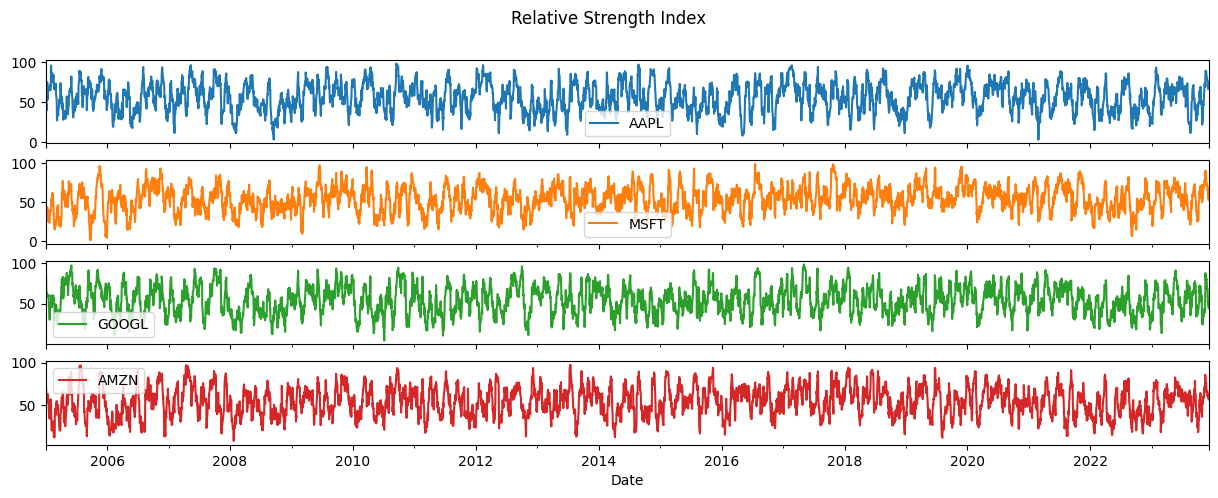

In [45]:
# Obtain the Relative Strength Index (RSI) for each company
rsi = technicals.get_relative_strength_index()

# Show the RSI for each company
display(rsi)

# Plot the RSI for each company
rsi.plot(subplots=True, figsize=(15, 5), title="Relative Strength Index")

Each functionality also has the ability to change parameters. As an example, the window for the Average Directional Index can be changed and the growth and lag can also be defined.

In [46]:
technicals.get_average_directional_index(window=20, growth=True, lag=[5, 10])

AAPL          MSFT         GOOGL          AMZN       
            Lag 5 Lag 10  Lag 5 Lag 10  Lag 5 Lag 10  Lag 5 Lag 10
Date                                                              
2005-01-03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2005-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2005-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2005-01-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
2005-01-07    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN
...           ...    ...    ...    ...    ...    ...    ...    ...
2023-11-28 0.7784   1.73 0.3448 0.8959 0.2258 0.0655  0.425  0.688
2023-11-29 0.7347 1.8428 0.3587 0.8443 0.4283 0.1166 0.4135 0.7252
2023-11-30 0.6509 1.8363 0.3916 0.7833 0.3324 0.1337 0.3313 0.7328
2023-12-01 0.5816 1.8112 0.3167 0.7463 0.2553 0.2164 0.2292 0.6667
2023-12-04 0.5473 1.7684 0.2351  0.654 0.1535 0.2534 0.1176 0.5792

[4763 rows x 8 columns]